@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

# Customer Retention Project

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

  Customer satisfaction has emerged as one of the most important factors that guarantee the success of online store; it has been posited as a key stimulant of purchase, repurchase intentions and customer loyalty. A comprehensive review of the literature, theories and models have been carried out to propose the models for customer activation and customer retention. Five major factors that contributed to the success of an e-commerce store have been identified as: service quality, system quality, information quality, trust and net benefit. The research furthermore investigated the factors that influence the online customers repeat purchase intention. The combination of both utilitarian value and hedonistic values are needed to affect the repeat purchase intention (loyalty) positively. The data is collected from the Indian online shoppers. Results indicate the e-retail success factors, which are very much critical for customer satisfaction.

In [2]:
#Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
#Extract dataset

data = pd.read_excel('customer_retention_dataset.xlsx','datasheet')
coded_data = pd.read_excel('customer_retention_dataset.xlsx','codedsheet')

In [4]:
pd.set_option('display.max_columns',None)  #to display maximum columns
pd.set_option('display.max_rows',None)#to display maximum rows

In [5]:
data.head(10)

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,12 Which channel did you follow to arrive at your favorite online store for the first time?,"13 After first visit, how do you reach the online retail store?\t\t\t\t",14 How much time do you explore the e- retail store before making a purchase decision?,15 What is your preferred payment Option?\t\t\t\t\t,16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t,"17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t",18 The content on the website must be easy to read and understand,19 Information on similar product to the one highlighted is important for product comparison,20 Complete information on listed seller and product being offered is important for purchase decision.,21 All relevant information on listed products must be stated clearly,22 Ease of navigation in website,23 Loading and processing speed,24 User friendly Interface of the website,25 Convenient Payment methods,26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time,27 Empathy (readiness to assist with queries) towards the customers,28 Being able to guarantee the privacy of the customer,"29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",30 Online shopping gives monetary benefit and discounts,31 Enjoyment is derived from shopping online,32 Shopping online is convenient and flexible,33 Return and replacement policy of the e-tailer is important for purchase decision,34 Gaining access to loyalty programs is a benefit of shopping online,35 Displaying quality Information on the website improves satisfaction of customers,36 User derive satisfaction while shopping on a good quality website or application,37 Net Benefit derived from shopping online can lead to users satisfaction,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent,"From the following, tick any (or all) of the online retailers you have shopped from;",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers’ information,Security of customer financial information,Perceived Trustworthiness,Presence of online assistance through multi-channel,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer 

In [4]:
# Let's check datset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                                                                                                                                                                                                          Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                          --------------  ----- 
 0   1Gender of respondent                                                                                                                                                                                           269 non-null    object
 1   2 How old are you?                                                                                                                                                                    

In [5]:
# Let's check null values using function

for i in data.columns:
    if data[i].isnull().sum()>0:
        print(i, "null values exists")
    else:
        print('Dataset is with no null values')
        break

Dataset is with no null values


<AxesSubplot:>

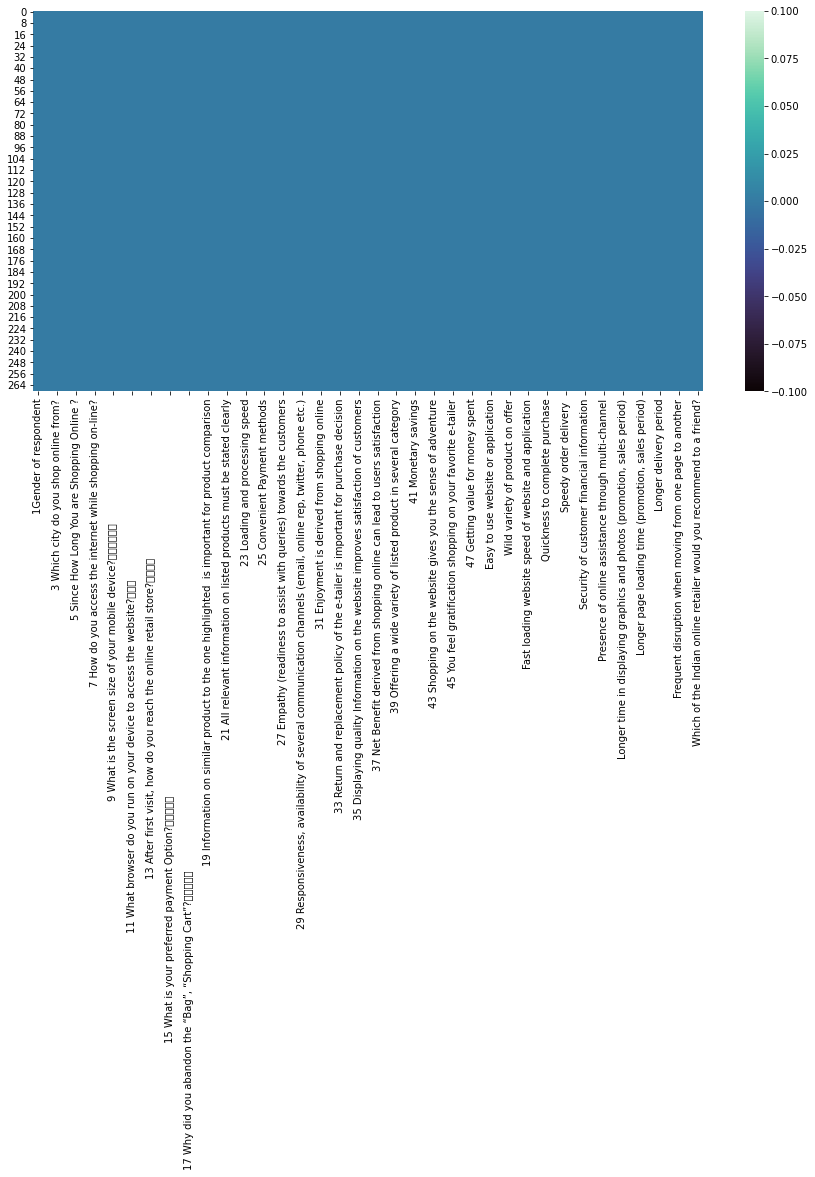

In [6]:

# Heatmap to see null values
plt.figure(figsize=(15,7))
sns.heatmap(data.isnull(),cmap = 'mako')

In [7]:
data.shape  #to check number of rows and columns

(269, 71)

In [ ]:
#Renameing the feature names

Gender of respondent --- gender

How old are you? --- age

Which city do you shop online from? --- city

What is the Pin Code of where you shop online from? --- pinCode

Since How Long You are Shopping Online ? --- shoppingSince

How many times you have made an online purchase in the past 1 year? --- shoppingFrequency

How do you access the internet while shopping on-line? --- internetAccessibility

Which device do you use to access the online shopping? --- deviceUsed

What is the screen size of your mobile device? --- screenSize

What is the operating system (OS) of your device? --- OS

What browser do you run on your device to access the website? --- browserUsed

Which channel did you follow to arrive at your favorite online store for the first time? --- channelFirstUsed

After first visit, how do you reach the online retail store? --- loginMode

How much time do you explore the e- retail store before making a purchase decision? --- timeSpentDeciding

What is your preferred payment Option? --- paymentMode

How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?--- cancellingFrequency

Why did you abandon the “Bag”, “Shopping Cart”? --- cancellationReason

The content on the website must be easy to read and understand --- contentReadability

Information on similar product to the one highlighted is important for product comparison --- similarProductInfo

Complete information on listed seller and product being offered is important for purchase decision. --- sellerProductInfo

All relevant information on listed products must be stated clearly --- productInfoClarity

Ease of navigation in website --- navigationEase

Loading and processing speed --- loadingProcessingSpeed

User friendly Interface of the website --- userFrienlyInterface

Convenient Payment methods --- conveninetPaymentMode

Trust that the online retail store will fulfill its part of the transaction at the stipulated time --- timelyFulfilmentTrust

Empathy (readiness to assist with queries) towards the customers --- custSupportResponse

Being able to guarantee the privacy of the customer --- custPrivacyGuarantee

Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.) --- variousChannelResponses

Online shopping gives monetary benefit and discounts --- benefit

Enjoyment is derived from shopping online --- enjoy

Shopping online is convenient and flexible --- convenience

Return and replacement policy of the e-tailer is important for purchase decision --- returnReplacementPolicy

Gaining access to loyalty programs is a benefit of shopping online --- loyaltyProgramsAccess

Displaying quality Information on the website improves satisfaction of customers --- infoSatisfaction

User derive satisfaction while shopping on a good quality website or application --- siteQualitySatisfaction

Net Benefit derived from shopping online can lead to users satisfaction --- netBenefitSatisfaction

User satisfaction cannot exist without trust --- trust

Offering a wide variety of listed product in several category --- productSeveralCategory

Provision of complete and relevant product information --- relevantProductInfo

Monetary savings --- monetarySavings

The Convenience of patronizing the online retailer --- patronizingConvenience

Shopping on the website gives you the sense of adventure --- adventureSense

Shopping on your preferred e-tailer enhances your social status --- socialStatus

You feel gratification shopping on your favorite e-tailer --- gratification

Shopping on the website helps you fulfill certain roles --- roleFulfilment

Getting value for money spent --- moneyWorthy

From the following, tick any (or all) of the online retailers you have shopped from --- shoppedFrom

Easy to use website or application --- easyWebApp

Visual appealing web-page layout --- visuallyAppealingWebApp

Wild variety of product on offer--- productVariety

Complete, relevant description information of products --- completeProductInfo

Fast loading website speed of website and application --- fastWebApp

Reliability of the website or application --- reliableWebApp

Quickness to complete purchase --- quickPurchase

Availability of several payment options --- paymentOptionsAvailability

Speedy order delivery --- fastDelivery

Privacy of customers information --- custInfoPrivacy

Security of customer financial information --- finInfoSecurity

Perceived Trustworthiness --- perceivedTrustworthiness

Presence of online assistance through multi-channel --- multiChannelAssistance

Longer time to get logged in (promotion, sales period) --- longLoginTime

Longer time in displaying graphics and photos (promotion, sales period) --- longDisplayTime

Late declaration of price (promotion, sales period) --- latePriceDeclare

Longer page loading time (promotion, sales period) --- longLoadingTime

Limited mode of payment on most products (promotion, sales period) --- limitedPaymentMode

Longer delivery period --- lateDelivery

Change in website/Application design --- webAppDesignChange

Frequent disruption when moving from one page to another --- pageDisruption

Website is as efficient as before --- webAppEfficiency

Which of the Indian online retailer would you recommend to a friend? --- recommendation

In [8]:
# Let's rename the new column names to the original datastes

columns = ['gender','age','city','pinCode','shoppingSince','shoppingFrequencySince_1year','internetAccessibility','deviceUsed',
           'screenSize','OS', 'browserUsed','channelFirstUsed','loginMode','timeSpentDeciding','paymentMode',
           'abandonMakingPaymentFrequency','abandonReason','contentReadability','highlightSimilarProductInfo',
           'sellerProductInfo','productInfoClarity','navigationEase','loadingProcessingSpeed','userFrienlyInterface',
           'conveninetPaymentMode','timelyFulfilmentTrust','custSupportResponse','custPrivacyGuarantee',
           'variousChannelResponses','onlineShoppingBenefit','enjoyment','convenient','returnReplacementPolicy',
           'loyaltyProgramsAccess','infoSatisfaction','siteQualitySatisfaction','netBenefitSatisfaction','trust',
           'productSeveralCategory','relevantProductInfo','monetarySavings','patronizingConvenience','adventureSense',
           'enhanceSocialStatus','gratification','roleFulfilment','moneyWorthy','shoppedFrom','easyWebApp',
           'visuallyAppealingWebApp','productVariety','completeProductInfo','fastWebApp','reliableWebApp','quickPurchase',
           'paymentOptionsAvailability','speedyDelivery','custInfoPrivacy','financial_InfoSecurity','perceivedTrustworthiness',
           'multiChannelAssistance','longLoginTime','longDisplayTime','latePriceDeclare','longLoadingTime','limitedPaymentMode',
           'LongerDeliveryPeriod','webAppDesignChange','frequentPageDisruption','webAppEfficiency','recommendation']

data.columns = columns
#coded_data.columns = columns

In [9]:
data.head(1)

,gender,age,city,pinCode,shoppingSince,shoppingFrequencySince_1year,internetAccessibility,deviceUsed,screenSize,OS,browserUsed,channelFirstUsed,loginMode,timeSpentDeciding,paymentMode,abandonMakingPaymentFrequency,abandonReason,contentReadability,highlightSimilarProductInfo,sellerProductInfo,productInfoClarity,navigationEase,loadingProcessingSpeed,userFrienlyInterface,conveninetPaymentMode,timelyFulfilmentTrust,custSupportResponse,custPrivacyGuarantee,variousChannelResponses,onlineShoppingBenefit,enjoyment,convenient,returnReplacementPolicy,loyaltyProgramsAccess,infoSatisfaction,siteQualitySatisfaction,netBenefitSatisfaction,trust,productSeveralCategory,relevantProductInfo,monetarySavings,patronizingConvenience,adventureSense,enhanceSocialStatus,gratification,roleFulfilment,moneyWorthy,shoppedFrom,easyWebApp,visuallyAppealingWebApp,productVariety,completeProductInfo,fastWebApp,reliableWebApp,quickPurchase,paymentOptionsAvailability,speedyDelivery,custInfoPrivacy,financial_InfoSecurity,perceivedTrustworthiness,multiChannelAssistance,longLoginTime,longDisplayTime,latePriceDeclare,longLoadingTime,limitedPaymentMode,LongerDeliveryPeriod,webAppDesignChange,frequentPageDisruption,webAppEfficiency,recommendation
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,Google chrome,Search Engine,Search Engine,6-10 mins,"E-wallets (Paytm, Freecharge etc.)",Sometimes,Lack of trust,Agree (4),Indifferent (3),Indifferent (3),Agree (4),Agree (4),Strongly disagree (1),Dis-agree (2),Dis-agree (2),Disagree (2),Strongly agree (5),Agree (4),Agree (4),indifferent (3),Strongly disagree (1),Dis-agree (2),Dis-agree (2),Agree (4),indifferent (3),Strongly agree (5),Agree (4),Strongly agree (5),indifferent (3),indifferent (3),Disagree (2),indifferent (3),Agree (4),Agree (4),Strongly agree (5),Agree (4),Strongly agree (5),"Amazon.in, Paytm.com",Paytm.com,Flipkart.com,Flipkart.com,Snapdeal.com,Snapdeal.com,Paytm.com,Paytm.com,Patym.com,Amazon.in,Amazon.in,Amazon.in,Flipkart.com,Paytm.com,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com


##### For a clear understanding, the features are divided in 3 parts as shown below


In [11]:

# categorical_columns are avaialable from column index 0 to 16
categorical_columns=data.iloc[:,:17].columns
categorical_columns=categorical_columns.to_list()
print('categorical_columns shape:', data[categorical_columns].shape)


# rating_columns are avaialable from column index 17 to 46
rating_columns=data.iloc[:,17:47].columns
rating_columns=rating_columns.to_list()
print('\nrating_columns shape:     ', data[rating_columns].shape)


# ecommerce_columns are avaialable from column index 47 and above
ecommerce_columns=data.iloc[:,47:].columns
ecommerce_columns=ecommerce_columns.to_list()
print('\necommerce_columns shape:  ', data[ecommerce_columns].shape)


categorical_columns shape: (269, 17)

rating_columns shape:      (269, 30)

ecommerce_columns shape:   (269, 24)


# Exploratory Data Analysis(EDA)

    Let us visualize and analyze data 

## Let's visualize and analize our categorical columns

##### Categorical_columns 

						 *** gender *** 

Female    181
Male       88
Name: gender, dtype: int64


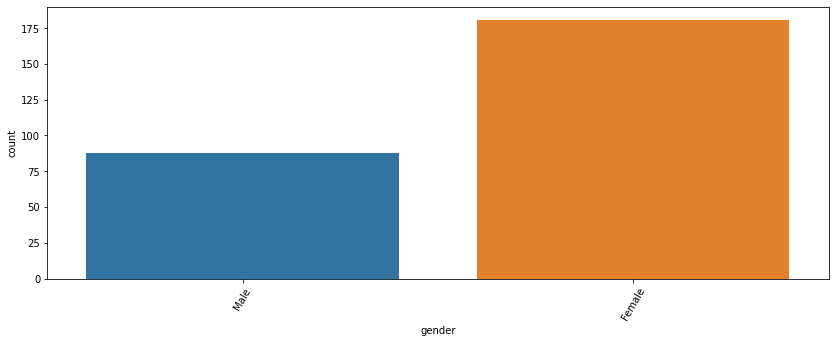

Observation: 

- Out of the total, more than half customers are female
----------------------------------------------------------------------------------------------------


						 *** age *** 

31-40 years           81
21-30 years           79
41-50 yaers           70
Less than 20 years    20
51 years and above    19
Name: age, dtype: int64


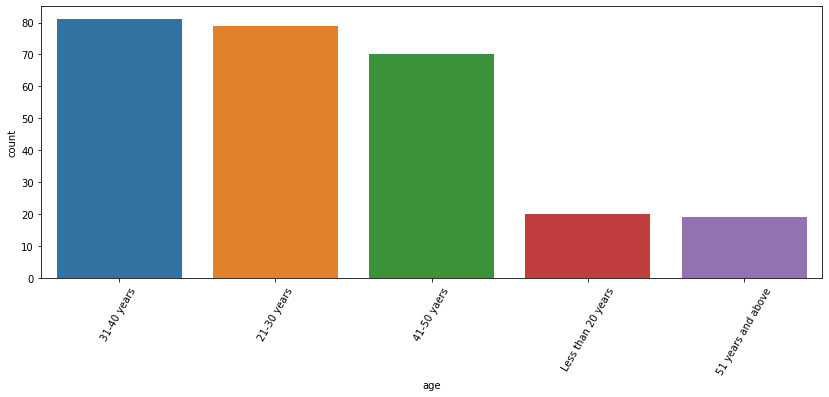

Observation: 

- Highest online shopping are done by the Age group of (31-40) years 
----------------------------------------------------------------------------------------------------


						 *** city *** 

Delhi            58
Greater Noida    43
Noida            40
Bangalore        37
Karnal           27
Solan            18
Ghaziabad        18
Gurgaon          12
Merrut            9
Moradabad         5
Bulandshahr       2
Name: city, dtype: int64


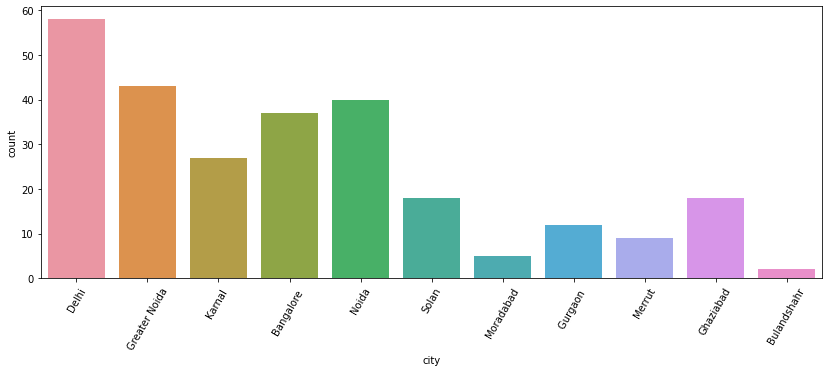

Observation: 

- "Delhi" contains highest number of participants then comes "Greater Noida", "Noida", "Bangalore" .Lowest are in "Bulandshahr"
----------------------------------------------------------------------------------------------------


						 *** pinCode *** 

201308    38
132001    19
201310    18
110044    16
173229     9
173212     9
250001     9
122018     8
560037     8
132036     8
560010     8
110011     7
110008     7
201306     7
110014     6
110018     6
201008     5
201009     5
201305     5
201312     5
244001     5
530068     5
201005     4
110009     4
110042     4
110039     4
110030     4
201304     4
122009     4
201303     4
560018     4
201001     4
560003     4
560002     4
560013     3
203001     2
203207     1
560001     1
203202     1
Name: pinCode, dtype: int64


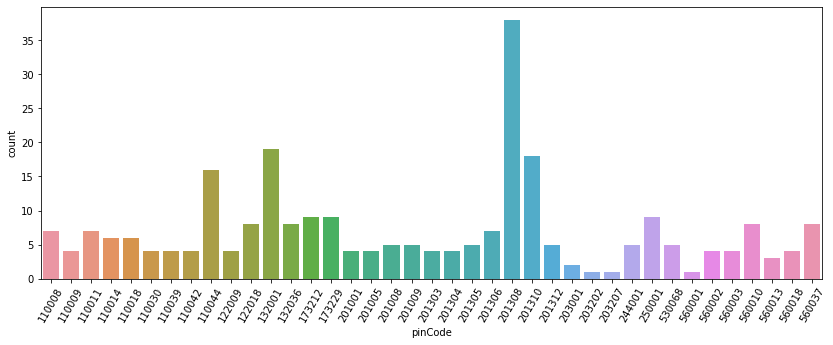

Observation: 

- Highest number of participants are from this pin location: "201306" and rest location also contains more than 2 counts
----------------------------------------------------------------------------------------------------


						 *** shoppingSince *** 

Above 4 years       98
2-3 years           65
3-4 years           47
Less than 1 year    43
1-2 years           16
Name: shoppingSince, dtype: int64


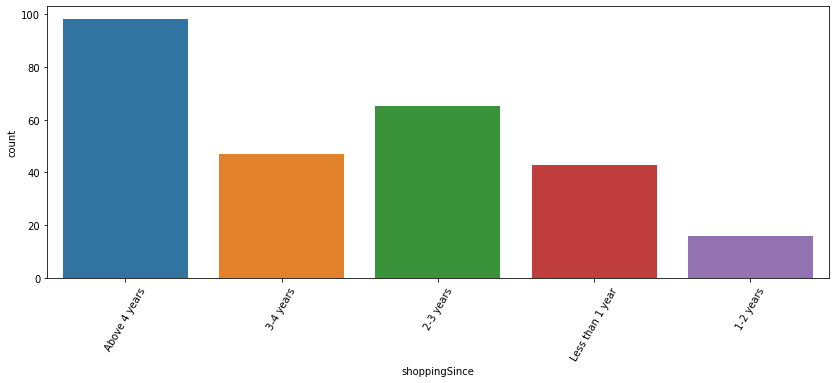

Observation: 

- Most of the Participants of the survey are shopping since 4 years/more  than 4 years 
----------------------------------------------------------------------------------------------------


						 *** shoppingFrequencySince_1year *** 

Less than 10 times    114
31-40 times            63
41 times and above     47
11-20 times            29
21-30 times            10
42 times and above      6
Name: shoppingFrequencySince_1year, dtype: int64


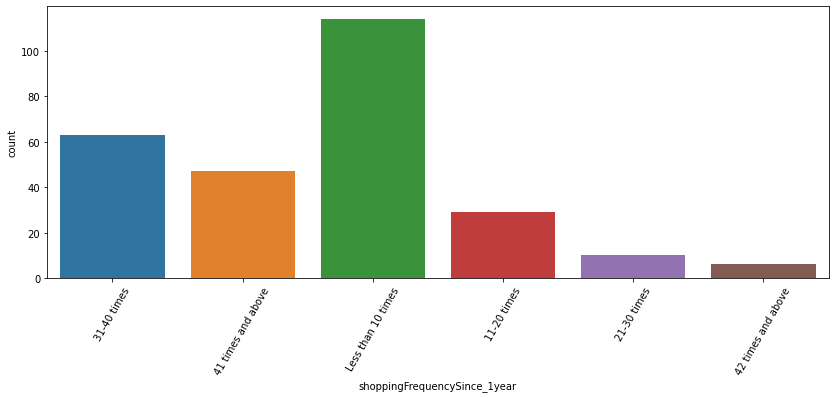

Observation: 

- More Participants had made purchases less than 10 times online but, count of (31-40)times purchases are not standing at least. Here, we can say that not all but almost half of the population have made purchases more than 10 times in the past 1 year.
----------------------------------------------------------------------------------------------------


						 *** internetAccessibility *** 

Mobile internet    142
Wi-Fi               76
Mobile Internet     47
Dial-up              4
Name: internetAccessibility, dtype: int64


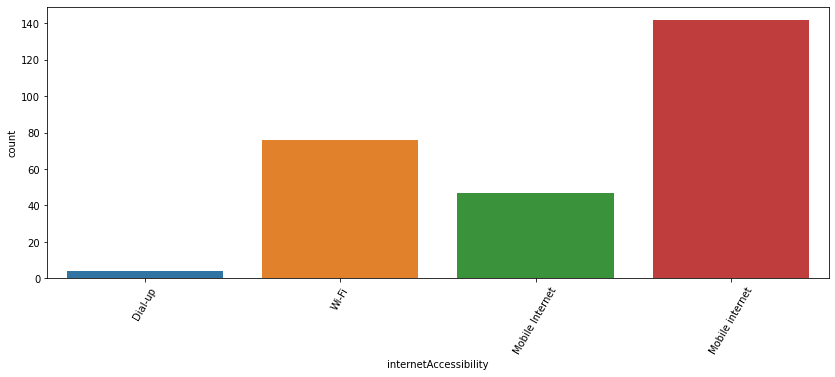

Observation: 

- Most of the participants use their Mobile internet to access products online/shop online
----------------------------------------------------------------------------------------------------


						 *** deviceUsed *** 

Smartphone    141
Laptop         86
Desktop        30
Tablet         12
Name: deviceUsed, dtype: int64


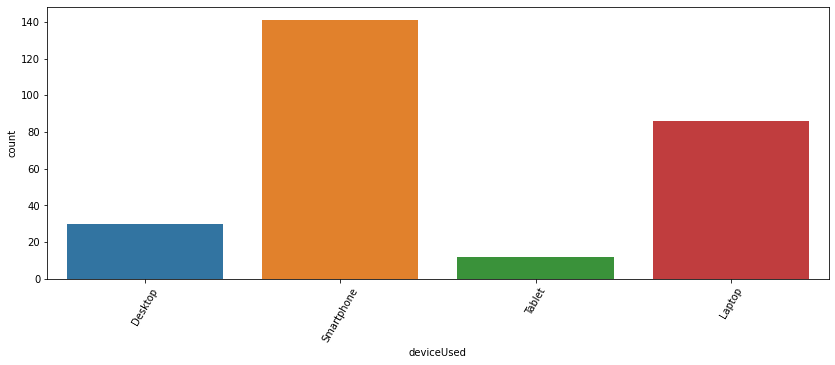

Observation: 

- Large number of participants use their Smartphone to shop online and we also have a good number of participants who go with purchases by Laptop 
----------------------------------------------------------------------------------------------------


						 *** screenSize *** 

Others        134
5.5 inches     99
4.7 inches     29
5 inches        7
Name: screenSize, dtype: int64


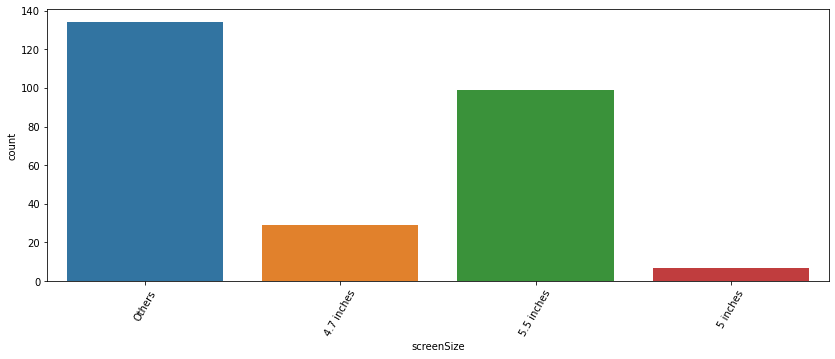

Observation: 

- Participants use their 5.5 inches of screensize to shop online largely, and here we can see that in our dataset contains most of the particpants use any other screensize
----------------------------------------------------------------------------------------------------


						 *** OS *** 

Window/windows Mobile    122
Android                   85
IOS/Mac                   62
Name: OS, dtype: int64


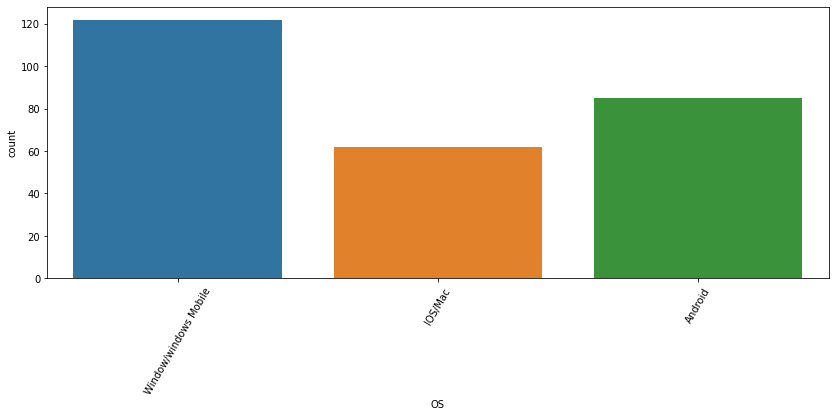

Observation: 

- Most participants uses "Window/windows Mobile" to shop online then, "Android" then, comes "IOS/Mac" at least
----------------------------------------------------------------------------------------------------


						 *** browserUsed *** 

Google chrome      216
Safari              40
Opera                8
Mozilla Firefox      5
Name: browserUsed, dtype: int64


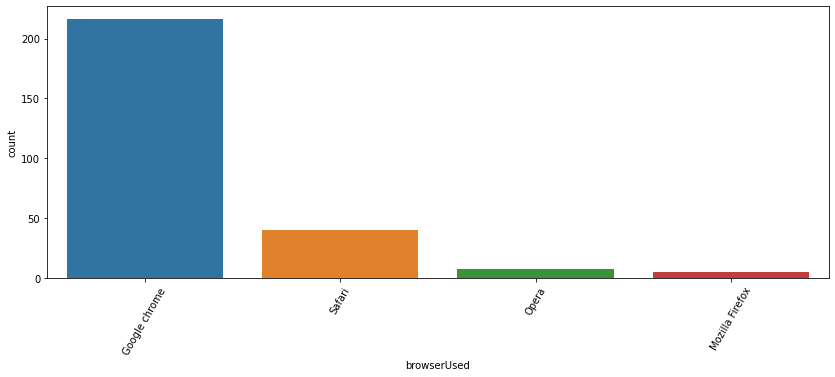

Observation: 

- "Google Chrome" browser are widely used for online website access when compared to other browser
----------------------------------------------------------------------------------------------------


						 *** channelFirstUsed *** 

Search Engine        230
Content Marketing     20
Display Adverts       19
Name: channelFirstUsed, dtype: int64


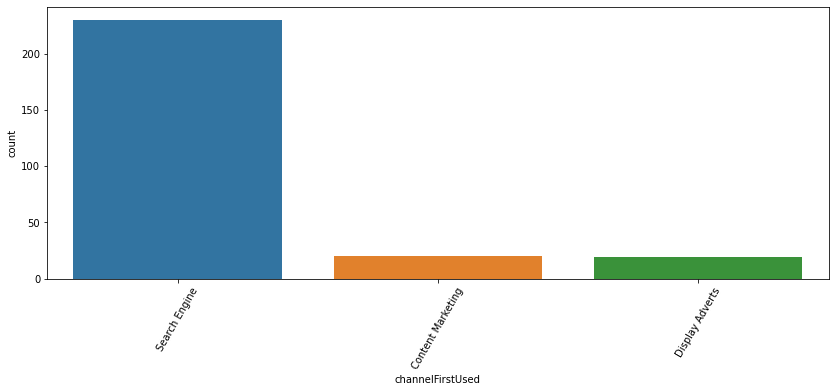

Observation: 

- "Search Engine" were widely used to follow to arrive at their favorite online store for the first time. And rest 50-50% "Content Marketing" and "Display Adverts" are used
----------------------------------------------------------------------------------------------------


						 *** loginMode *** 

Search Engine      87
Via application    86
Direct URL         70
E-mail             18
Social Media        8
Name: loginMode, dtype: int64


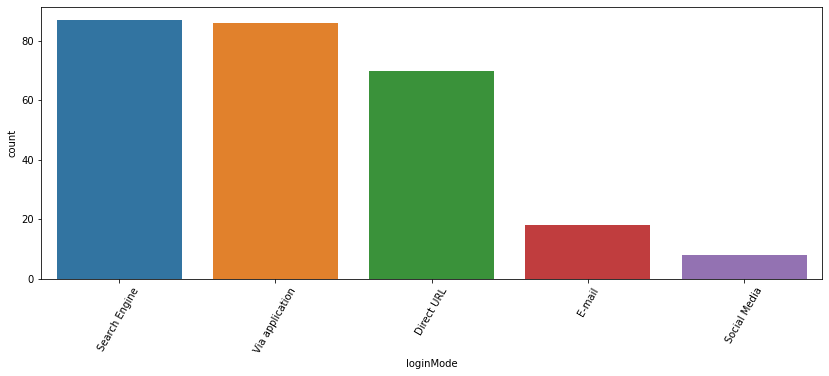

Observation: 

- Most Participants use "Search Engine" and "Application" for reaching the online retail store. 
----------------------------------------------------------------------------------------------------


						 *** timeSpentDeciding *** 

more than 15 mins    123
6-10 mins             71
11-15 mins            46
Less than 1 min       15
1-5 mins              14
Name: timeSpentDeciding, dtype: int64


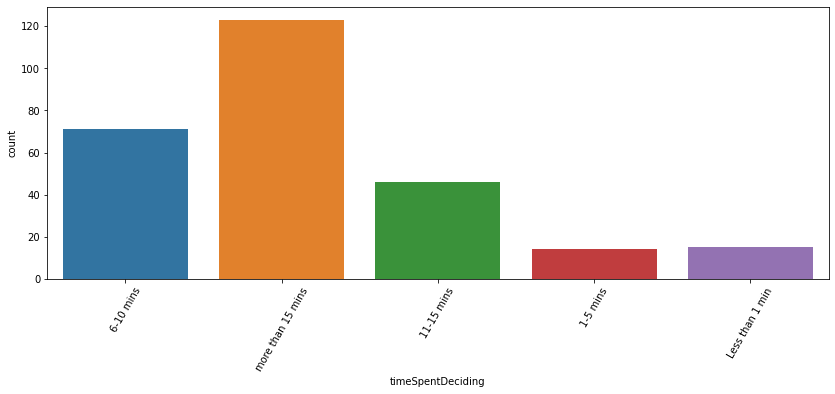

Observation: 

- Most of the customers explore the e- retail store for about more than 15 minutes before making a purchase decision.
----------------------------------------------------------------------------------------------------


						 *** paymentMode *** 

Credit/Debit cards                    148
Cash on delivery (CoD)                 76
E-wallets (Paytm, Freecharge etc.)     45
Name: paymentMode, dtype: int64


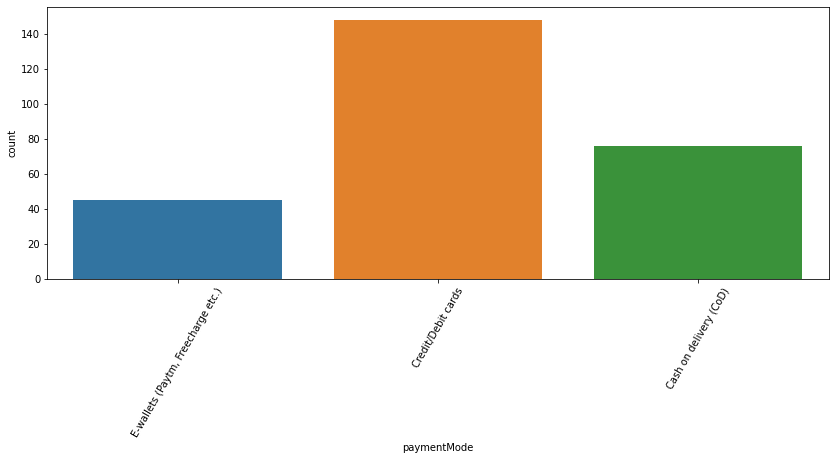

Observation: 

- "Credit/Debit cards" are the most preferred payment Option then, the "Cash on Delivery" has the highest count when compared to "E-wallets (Paytm, Freecharge etc.)".
----------------------------------------------------------------------------------------------------


						 *** abandonMakingPaymentFrequency *** 

Sometimes          171
Never               48
Frequently          35
Very frequently     15
Name: abandonMakingPaymentFrequency, dtype: int64


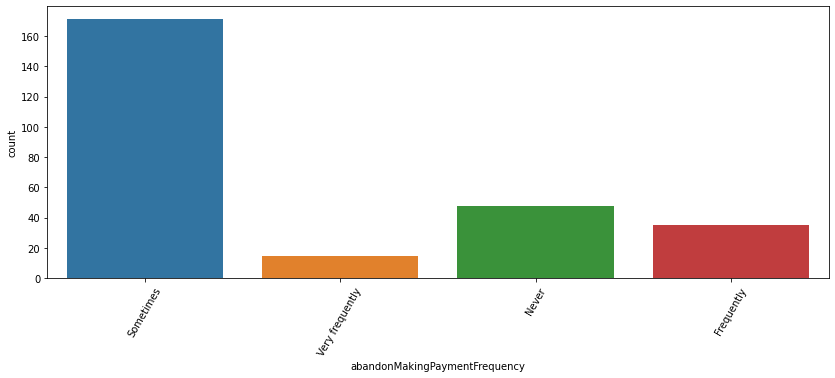

Observation: 

- Most of the participants sometimes abandon(leaving without making payment) their shopping cart.
----------------------------------------------------------------------------------------------------


						 *** abandonReason *** 

Better alternative offer        133
Promo code not applicable        54
Change in price                  37
Lack of trust                    31
No preferred mode of payment     14
Name: abandonReason, dtype: int64


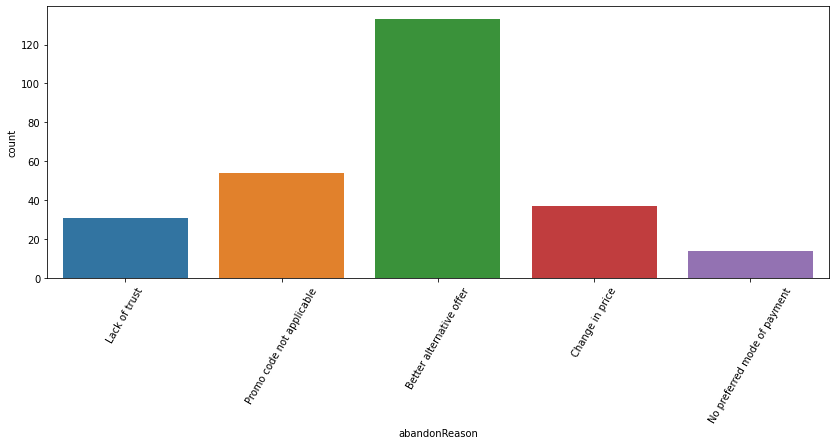

Observation: 

- Most participants get "Better alternative offer" so, they abandon their shopping cart. And the second main reason to abandon is "Promo code not applicable". Then comes the reasons "Change in Price", "Lack of trust" and "No preferred mode of payment". Here, we can see that we also have a good number of participants who abandon due to "Lack of trust", hence. there is a need to get the trust from the participants
----------------------------------------------------------------------------------------------------




In [20]:
#Let's see the plot for all the categorical parameters

for col in categorical_columns:
    print('\t'*6,'***',col,'***','\n')
    print(data[col].value_counts())
    plt.figure(figsize=(14,5))    
    sns.countplot(x=data[col])
    plt.xticks(rotation=60)    
    plt.show()
    print('Observation: \n')
    input('- ')
    print('-----'*20)
    print('\n')


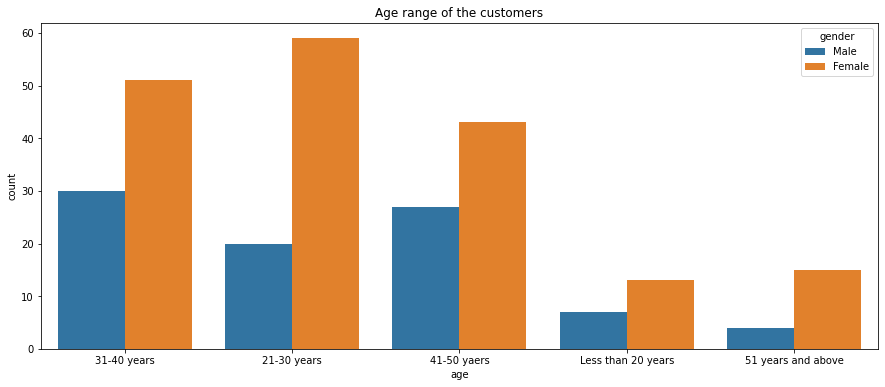

In [21]:
data['age'].value_counts()
plt.figure(figsize=(15,6))
sns.countplot(x=data['age'],hue = data['gender'])
plt.title('Age range of the customers')
plt.show()

Text(0.5, 1.0, 'Age range of the customers')

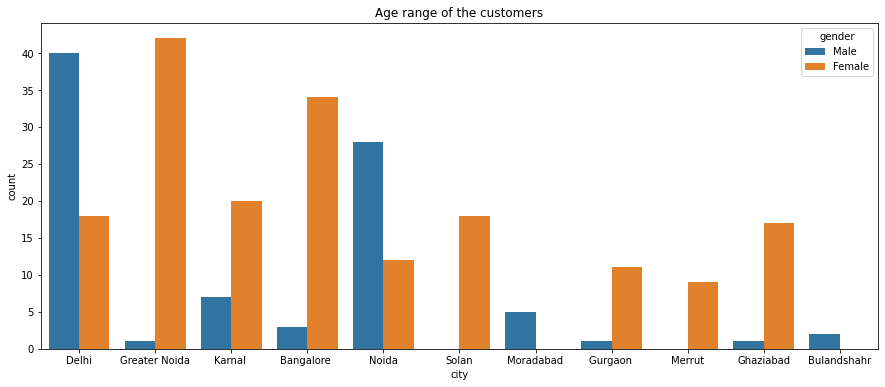

In [24]:
data['deviceUsed'].value_counts()
plt.figure(figsize=(15,6))
sns.countplot(x=data['city'],hue = data['gender'])
plt.title('Age range of the customers')

### Observations:
    - In Delhi, Noida, Moradabad and Bulandshahr, we find "Male shoppers" are more in number
    - Rest, high number of Female shoppers are almost everywhere

### Rating_columns

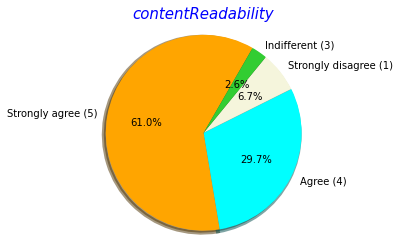

----------------------------------------------------------------------------------------------------




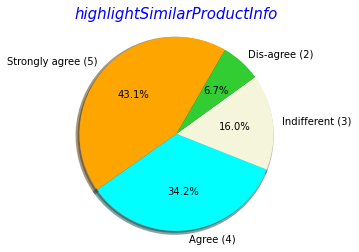

----------------------------------------------------------------------------------------------------




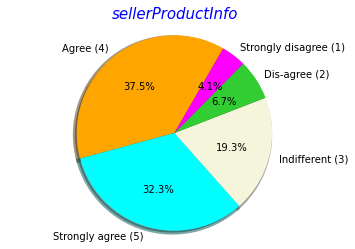

----------------------------------------------------------------------------------------------------




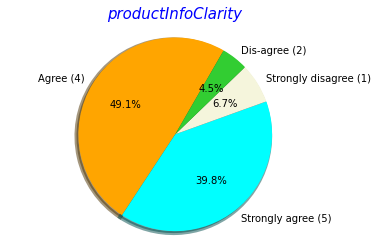

----------------------------------------------------------------------------------------------------




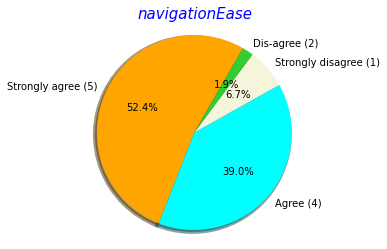

----------------------------------------------------------------------------------------------------




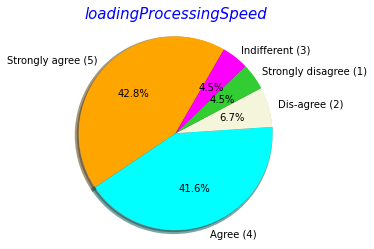

----------------------------------------------------------------------------------------------------




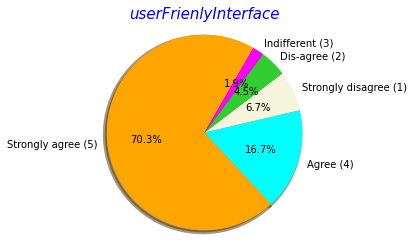

----------------------------------------------------------------------------------------------------




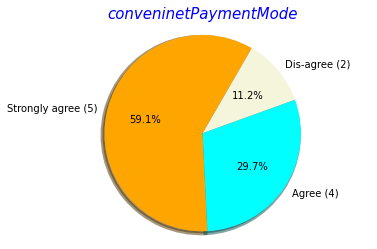

----------------------------------------------------------------------------------------------------




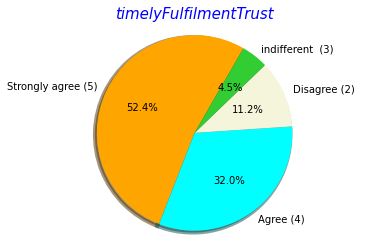

----------------------------------------------------------------------------------------------------




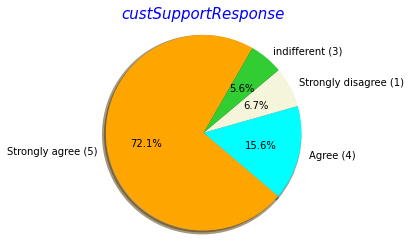

----------------------------------------------------------------------------------------------------




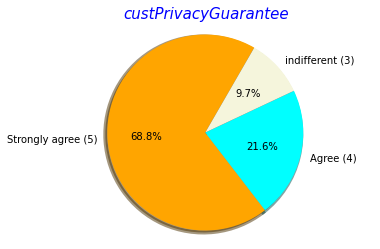

----------------------------------------------------------------------------------------------------




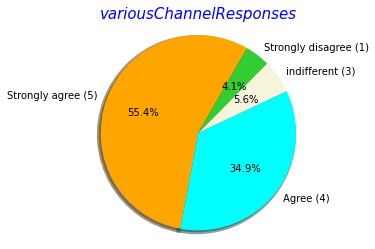

----------------------------------------------------------------------------------------------------




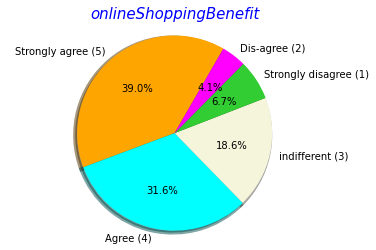

----------------------------------------------------------------------------------------------------




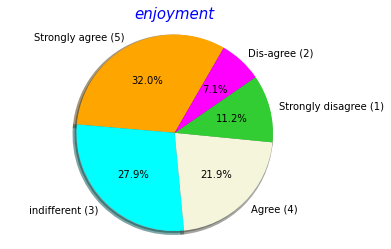

----------------------------------------------------------------------------------------------------




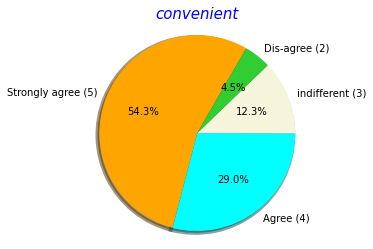

----------------------------------------------------------------------------------------------------




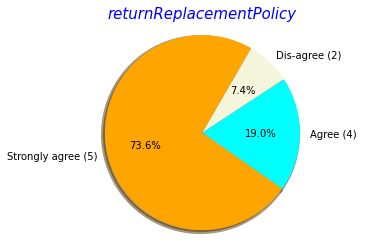

----------------------------------------------------------------------------------------------------




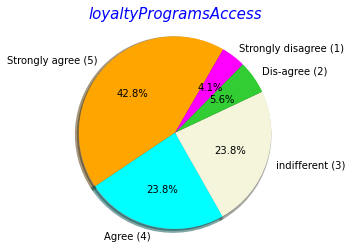

----------------------------------------------------------------------------------------------------




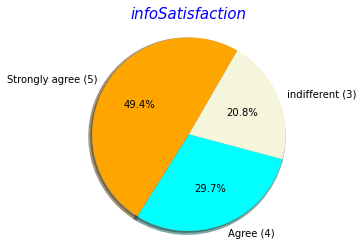

----------------------------------------------------------------------------------------------------




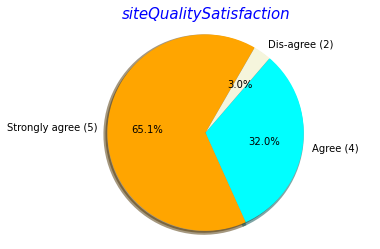

----------------------------------------------------------------------------------------------------




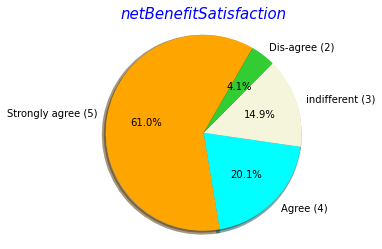

----------------------------------------------------------------------------------------------------




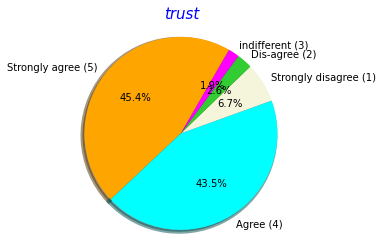

----------------------------------------------------------------------------------------------------




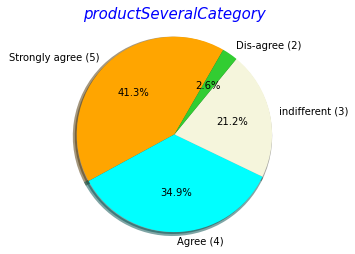

----------------------------------------------------------------------------------------------------




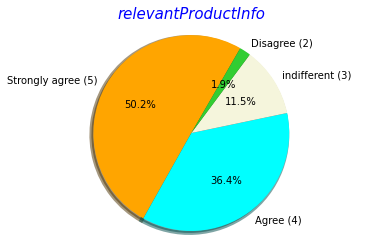

----------------------------------------------------------------------------------------------------




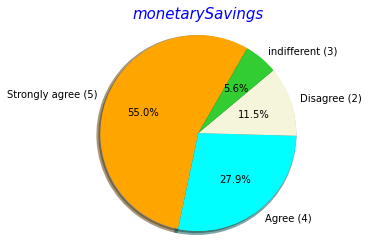

----------------------------------------------------------------------------------------------------




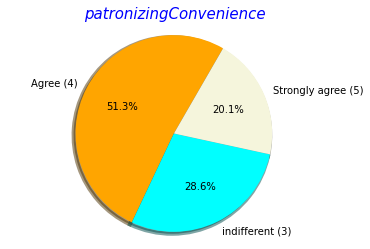

----------------------------------------------------------------------------------------------------




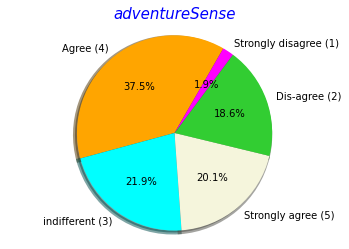

----------------------------------------------------------------------------------------------------




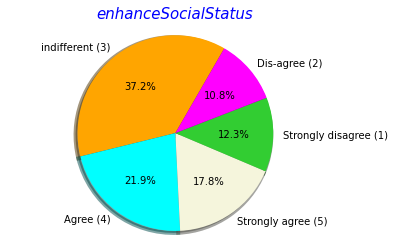

----------------------------------------------------------------------------------------------------




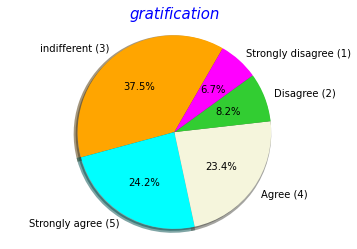

----------------------------------------------------------------------------------------------------




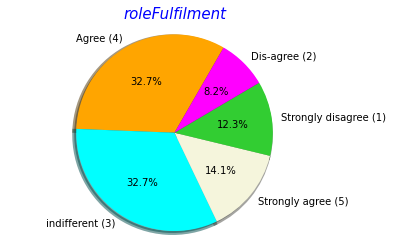

----------------------------------------------------------------------------------------------------




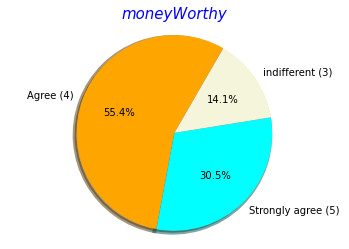

----------------------------------------------------------------------------------------------------




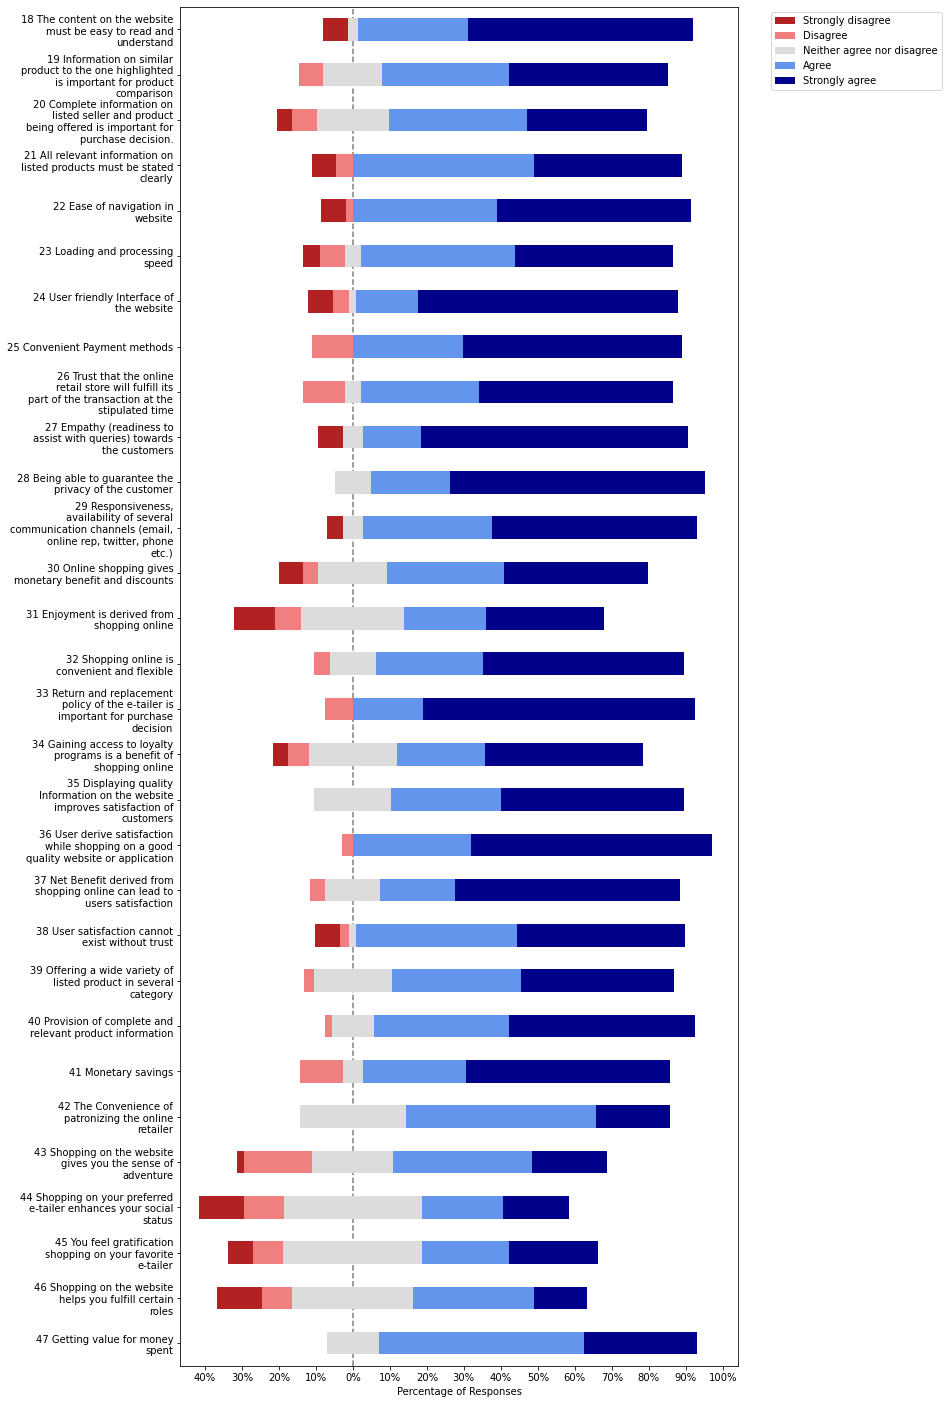

In [39]:
# Pie charts for some of the features 

for i in rating_columns:
    plt.subplots()
    plt.pie(x=data[i].value_counts(),labels=data[i].value_counts().index,data=data,shadow=True, 
            startangle=60,autopct='%1.1f%%',colors=['orange', 'cyan','beige','limegreen', 'magenta', 'crimson'],
            wedgeprops = {'linewidth': 4})
    plt.setp(plt.title(i,fontsize=15,color='darkred'),color='blue',style='italic')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()
    print("----------"*10)
    print('\n')
    #break

    
#Let's also use the coded data for this part

coded_data = pd.read_excel('customer_retention_dataset.xlsx','codedsheet')
df = pd.read_excel('customer_retention_dataset.xlsx','datasheet')

rating_cols=df.iloc[:,17:47].columns
rating_cols=rating_cols.to_list()

ratings = {1: 'Strongly disagree', 2: 'Disagree', 3: 'Neither agree nor disagree', 4: 'Agree', 5: 'Strongly agree'} 


# Rename the values of the dataframe 
for col in rating_cols:
    coded_data.replace({col: ratings},inplace=True)
    

import plot_likert

plot_likert.plot_likert(coded_data[rating_cols], plot_likert.scales.agree, plot_percentage=True,figsize=(10,25))
plt.show()

### Observations on the basis of Customer's perception

- Customers mostly believe that the content on the website must be easy to read and understand
- People agree that information on similar product to the one highlighted is important for product comparison
- 70% people believe that Complete information on listed seller and product is important for purchase decision.
- 90% people believe that All relevant information on listed products must be stated clearly
- For more than 90% of the people believe that the following parameters are important
        - Ease of navigation in website
        - Loading and processing speed
        - User friendly Interface of the website 
        - Convenient Payment methods
        - Trust that the online retail store will fulfill its part of the transaction at the stipulated time
        - Empathy (readiness to assist with queries) towards the customers
        - Being able to guarantee the privacy of the customer
        - Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.) 
        - Online shopping gives monetary benefit and discounts
        - Getting value for money spent
- Around 70% people believe that Enjoyment is derived from shopping online 
- 90% people believe that Shopping online is convenient and flexible
- more than 90% of the people believe that Return and replacement policy of the e-tailer is important for purchase decision
- most of the people believe that Gaining access to loyalty programs is a benefit of shopping online

### Observations based on Satisfaction:
- Around 20% people don't that Displaying quality Information on the website improves satisfaction of customers. The other 80% agree that it os important.
- customers are in favour of "Strongly Agreement or Agree" :
        - User derive satisfaction while shopping on a good quality website or application
        - Net Benefit derived from shopping online can lead to users satisfaction 
        - User satisfaction cannot exist without trust
        - Offering a wide variety of listed product in several category
        - Provision of complete and relevant product information
        - Monetary savings
        - The Convenience of patronizing the online retailer
- People strongly believe: Shopping on the website gives you the sense of adventure, but we do have 10-30% who disagree
- Around 60-80 % people believe that
        - Shopping on your preferred e-tailer enhances your social status
        - You feel gratification shopping on your favorite e-tailer
        - Shopping on the website helps you fulfill certain roles 

### Ecommerce-Columns

							 * shoppedFrom * 

Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    82
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               44
Amazon.in, Flipkart.com                                         32
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                29
Amazon.in, Flipkart.com, Snapdeal.com                           27
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in                                                       16
Amazon.in, Paytm.com                                            12
Amazon.in, Flipkart.com, Paytm.com                               7
Name: shoppedFrom, dtype: int64


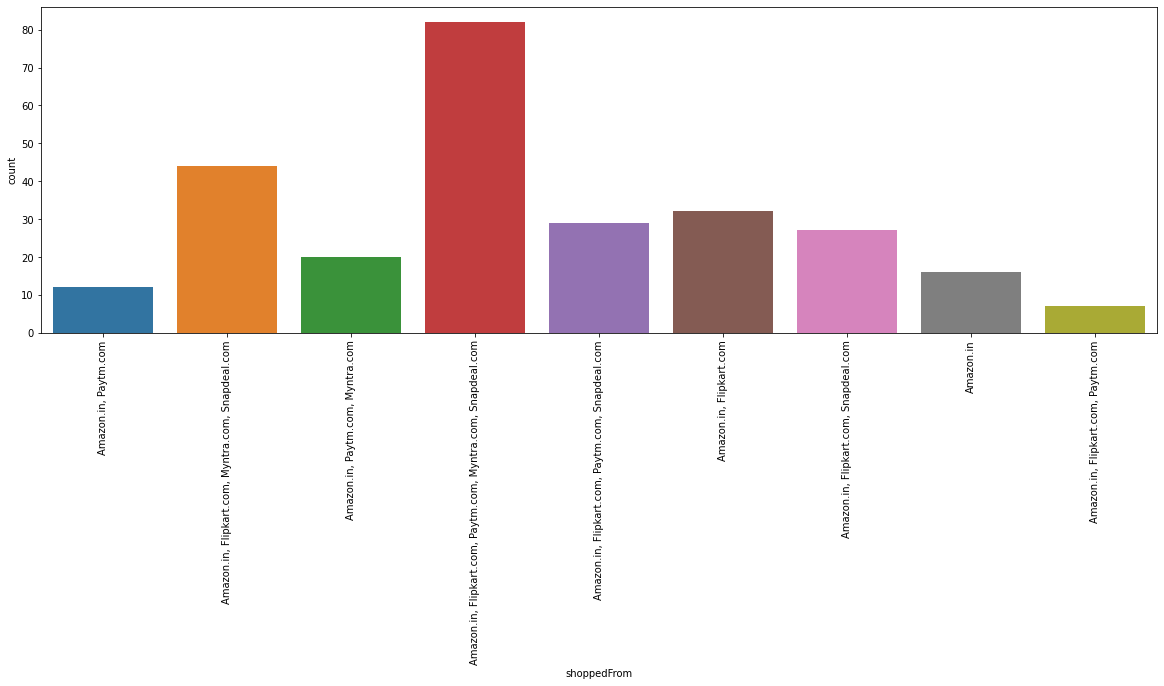

Observation: 

- Most Participants have shopped from these 5 companies - "Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com".
----------------------------------------------------------------------------------------------------


							 * easyWebApp * 

Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    64
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               44
Amazon.in, Flipkart.com                                         44
Amazon.in                                                       29
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                22
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in, Flipkart.com, Myntra.com                             19
Paytm.com                                                       12
Flipkart.com                                                     8
Amazon.in, Paytm.com                                             7
Name: easyWebApp, dtype: int64


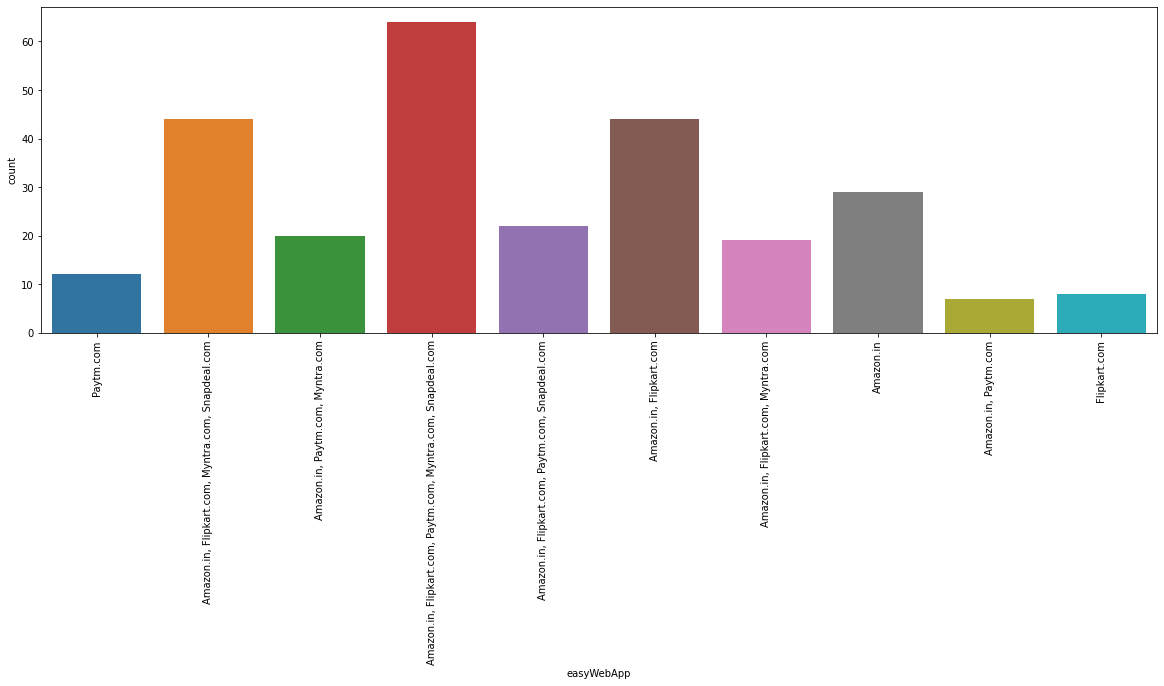

Observation: 

- "Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com Also, Amazon.com and Flipkart.com" have the website or application which are Easy to use 
----------------------------------------------------------------------------------------------------


							 * visuallyAppealingWebApp * 

Amazon.in, Flipkart.com                                         87
Amazon.in                                                       44
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    36
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in, Myntra.com                                           15
Myntra.com                                                      15
Flipkart.com, Myntra.com                                        15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Flipkart.com                                                    12
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                11
Name: visuallyAppeal

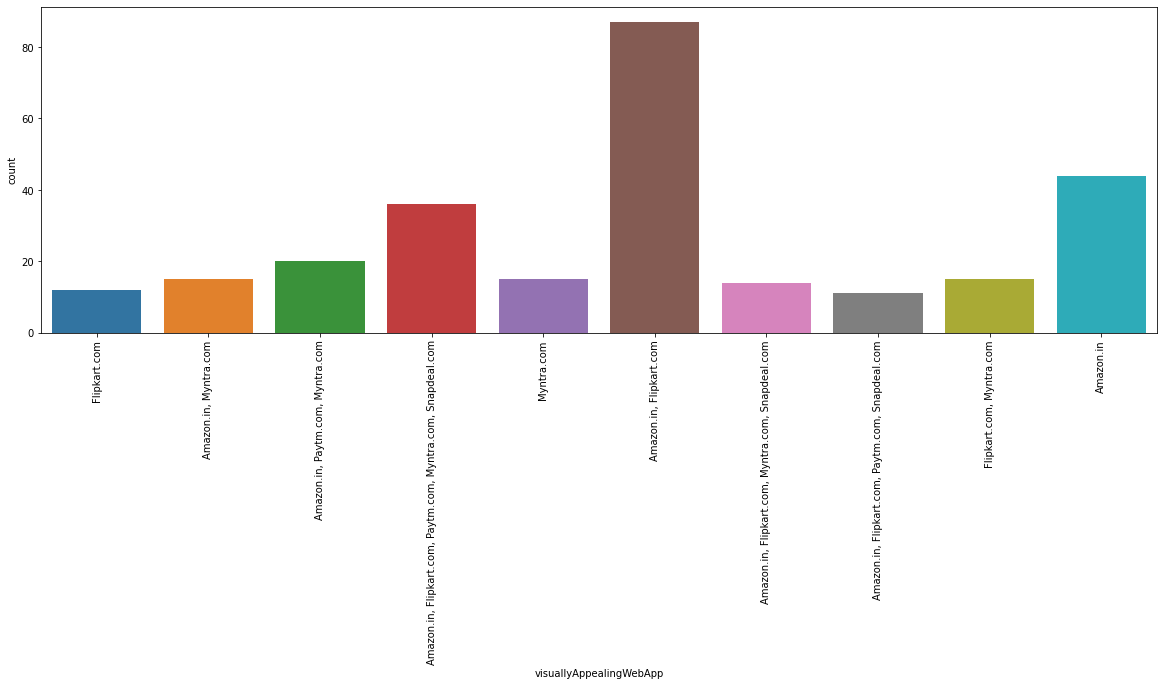

Observation: 

- "Amazon.com and Flipkart.com"  has a good "Visual appeal web-page layout' as per the survey
----------------------------------------------------------------------------------------------------


							 * productVariety * 

Amazon.in, Flipkart.com                              130
Amazon.in                                             43
Amazon.in, Myntra.com                                 20
Myntra.com                                            15
Flipkart.com, Myntra.com                              15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com     14
Amazon.in, Flipkart.com, Paytm.com                    13
Flipkart.com                                          12
Paytm.com                                              7
Name: productVariety, dtype: int64


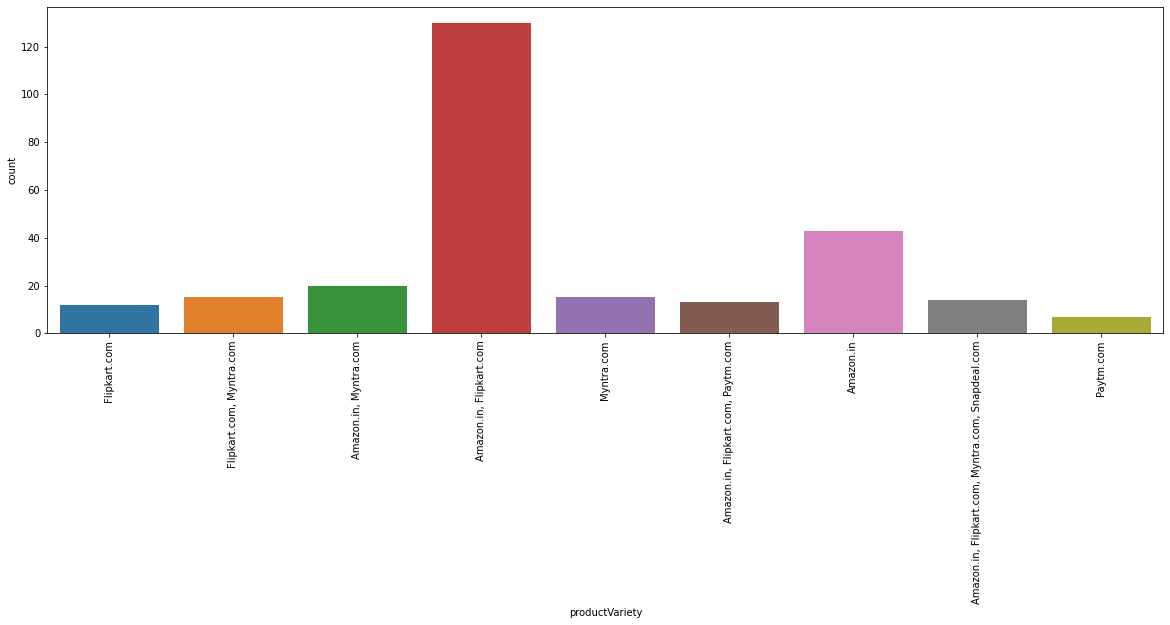

Observation: 

- Wide variety of product on offer are mostly obtained in ""Amazon.com and Flipkart.com""
----------------------------------------------------------------------------------------------------


							 * completeProductInfo * 

Amazon.in, Flipkart.com                                         100
Amazon.in                                                        43
Amazon.in, Flipkart.com, Paytm.com                               24
Amazon.in, Paytm.com, Myntra.com                                 20
Amazon.in, Flipkart.com, Myntra.com                              15
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com     15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com                14
Snapdeal.com                                                     12
Flipkart.com, Snapdeal.com                                       11
Flipkart.com                                                      8
Amazon.in, Flipkart.com, Snapdeal.com                             7
Name: comp

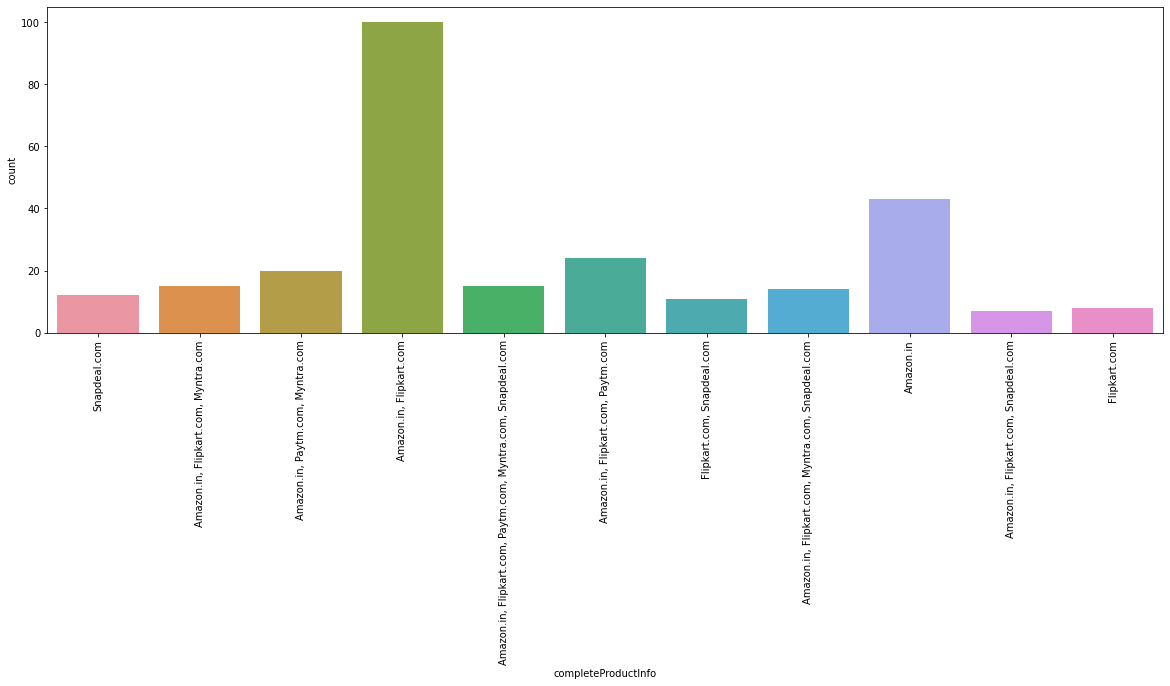

Observation: 

- Complete, relevant description information of products: Highest count again goes to "Amazon.com and Flipkart.com".
----------------------------------------------------------------------------------------------------


							 * fastWebApp * 

Amazon.in                                                       51
Amazon.in, Paytm.com                                            44
Amazon.in, Flipkart.com, Myntra.com                             30
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    30
Amazon.in, Flipkart.com                                         30
Amazon.in, Flipkart.com, Snapdeal.com                           25
Amazon.in, Flipkart.com, Paytm.com                              25
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Snapdeal.com                                                    12
Flipkart.com                                                     8
Name: fastWebApp, dtype: int64


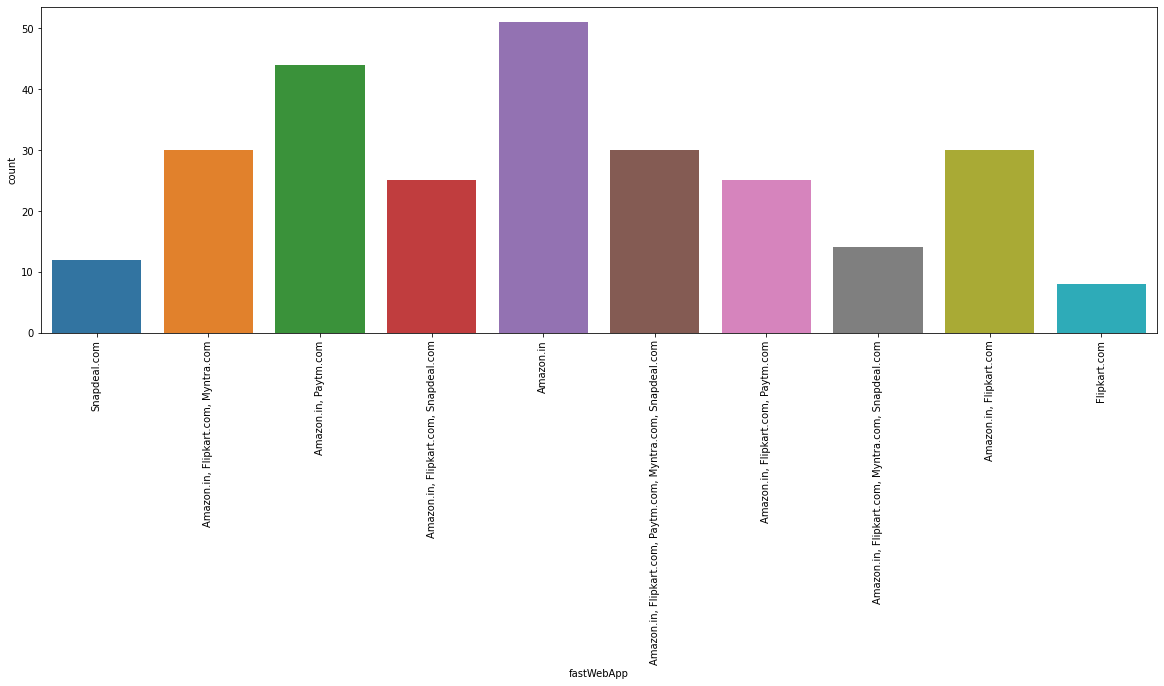

Observation: 

- Fast loading website speed /of website and application : "Amazon.com" stands at the highest count
----------------------------------------------------------------------------------------------------


							 * reliableWebApp * 

Amazon.in                                            61
Amazon.in, Flipkart.com                              50
Amazon.in, Flipkart.com, Paytm.com                   36
Amazon.in, Paytm.com, Myntra.com                     35
Amazon.in, Flipkart.com, Snapdeal.com                18
Myntra.com                                           15
Flipkart.com                                         15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com    14
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com     13
Paytm.com                                            12
Name: reliableWebApp, dtype: int64


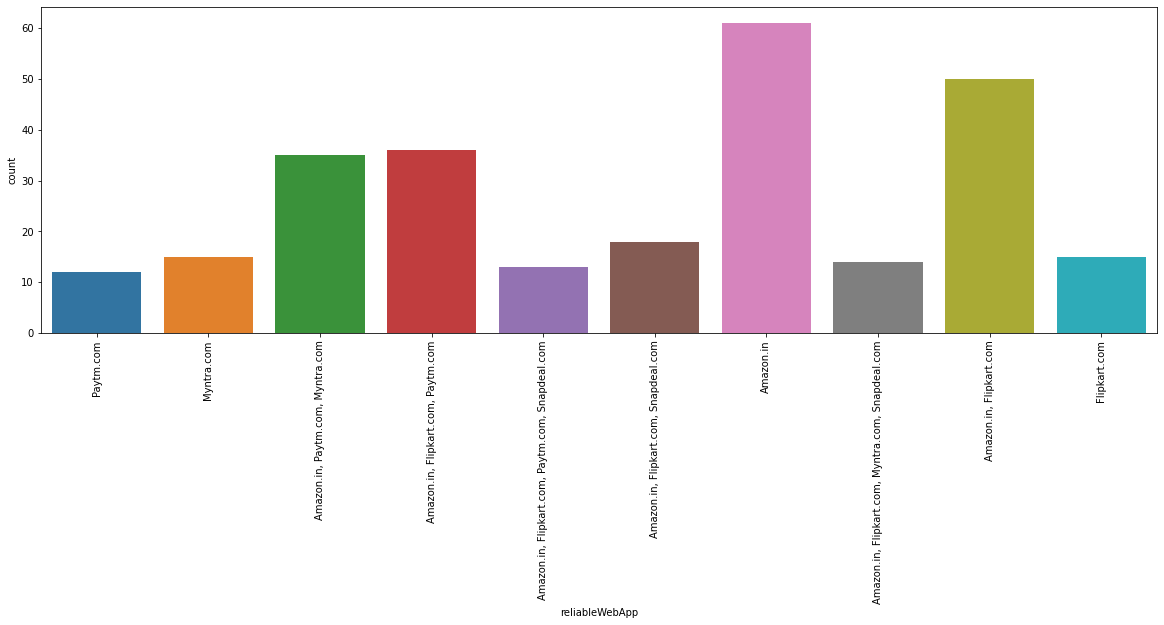

Observation: 

- Reliability of the website or application:  "Amazon.com"  is at highest next "Amazon.com and Flipkart.com " once again
----------------------------------------------------------------------------------------------------


							 * quickPurchase * 

Amazon.com                                                   66
Amazon.com, Flipkart.com, Paytm.com                          47
Amazon.com, Flipkart.com                                     37
Amazon.com, Flipkart.com, Myntra.com                         30
Paytm.com                                                    25
Amazon.com, Paytm.com, Myntra.com                            20
Flipkart.com                                                 15
Amazon.com, Flipkart.com, Paytm.com, Myntra.com, Snapdeal    15
Flipkart.com, Myntra.com, Snapdeal                           14
Name: quickPurchase, dtype: int64


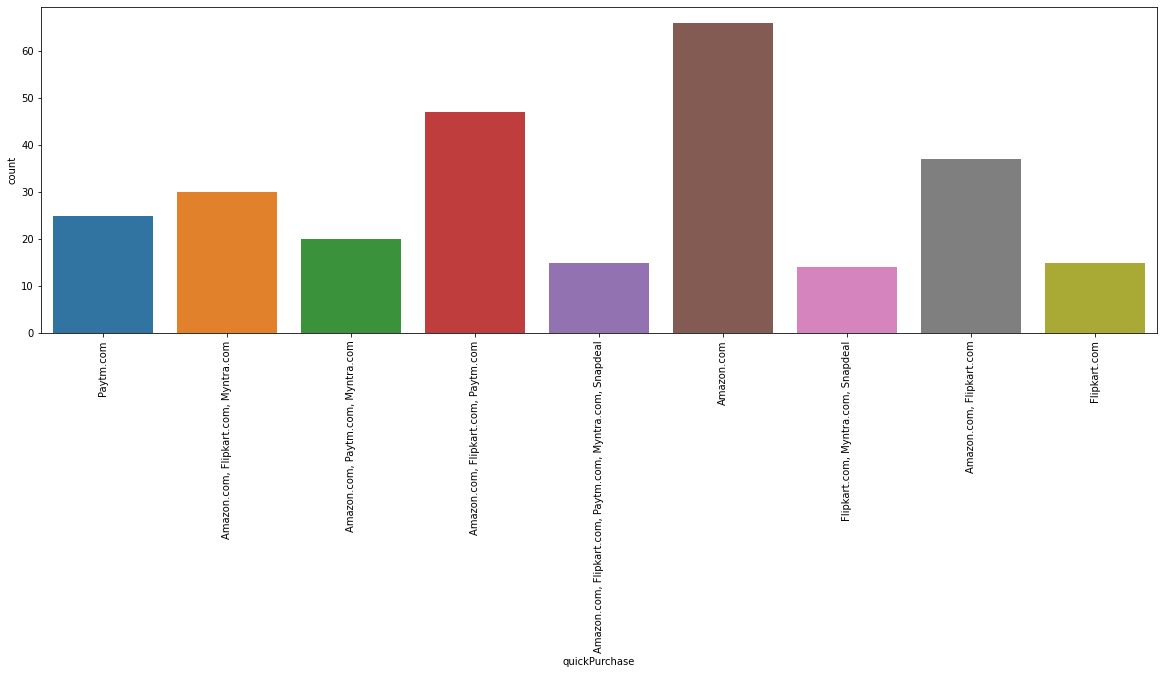

Observation: 

- Quickness to complete purchase: provided highly by "Amazon.com", not only Amazon but we do have "Flipkart.com" and "Paytm.com" who also contributes largely
----------------------------------------------------------------------------------------------------


							 * paymentOptionsAvailability * 

Amazon.in, Flipkart.com                                         65
Amazon.in, Flipkart.com, Myntra.com                             40
Amazon.in, Flipkart.com, Patym.com, Myntra.com, Snapdeal.com    39
Amazon.in                                                       23
Patym.com, Myntra.com                                           20
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               19
Amazon.in, Flipkart.com, Snapdeal.com                           18
Flipkart.com, Myntra.com, Snapdeal.com                          14
Patym.com                                                       12
Amazon.in, Patym.com                                            11
Flipkart.com 

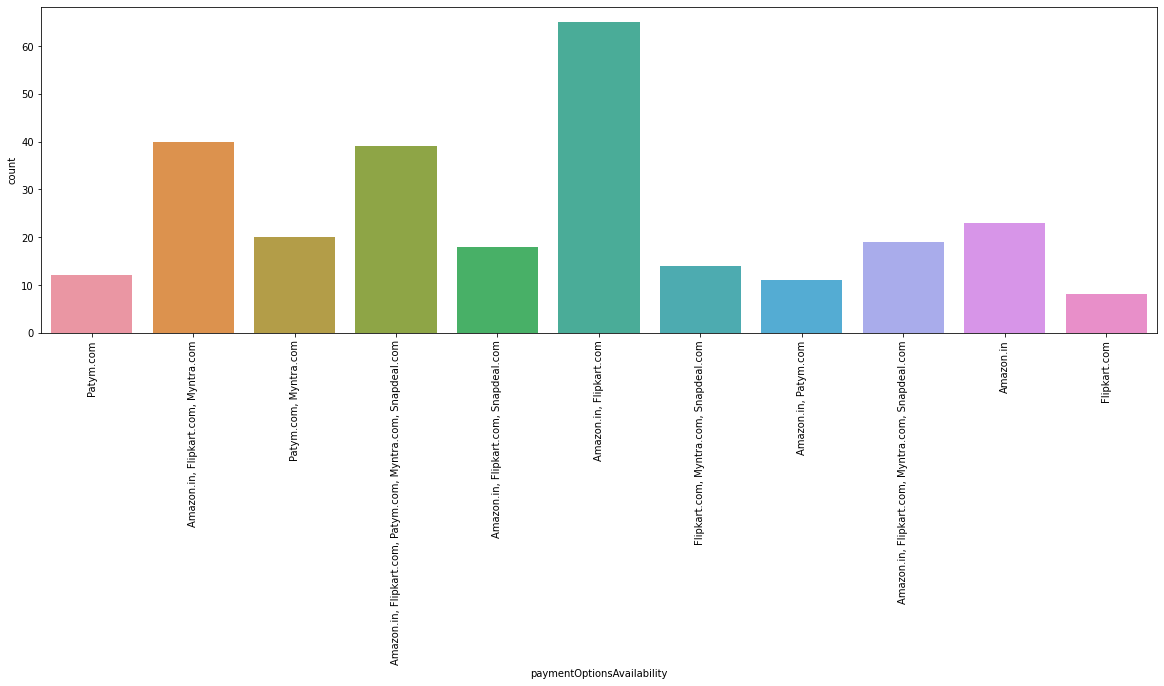

Observation: 

- Availability of several payment options: Here, Amazon and Flipkart, both are the favourites. Although a lot of people also tend to go towards Myntra
----------------------------------------------------------------------------------------------------


							 * speedyDelivery * 

Amazon.in                                 107
Amazon.in, Flipkart.com                    82
Amazon.in, Flipkart.com, Snapdeal.com      36
Amazon.in, Flipkart.com, Myntra.com        15
Flipkart.com                               15
Flipkart.com, Myntra.com, Snapdeal.com     14
Name: speedyDelivery, dtype: int64


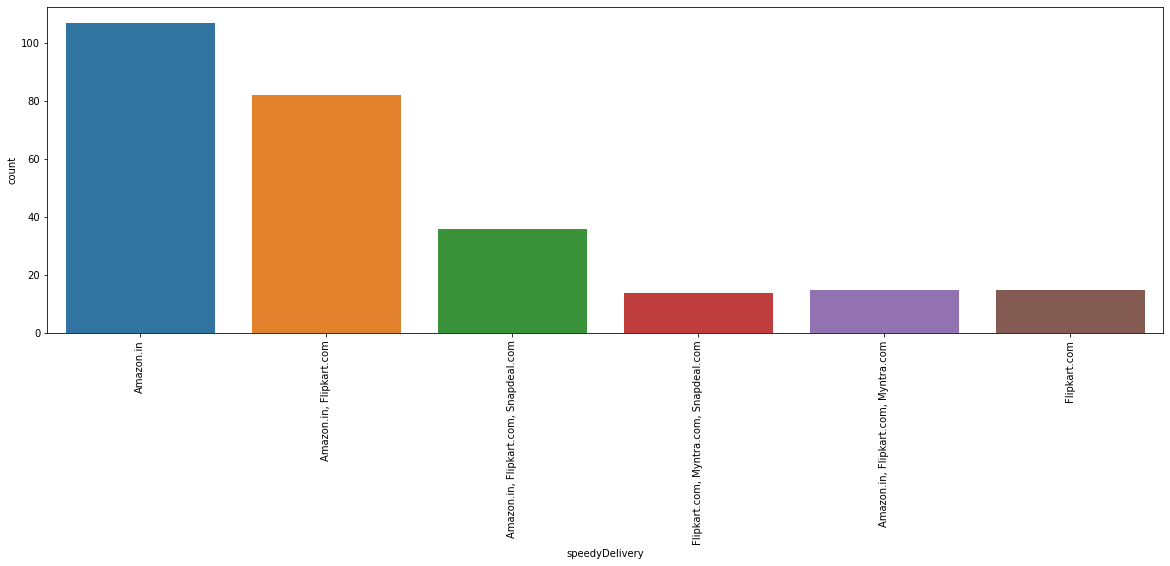

Observation: 

- Speedy order delivery: Amazon seems to take the lead in this category too, followed by Flipkart.
----------------------------------------------------------------------------------------------------


							 * custInfoPrivacy * 

Amazon.in                                                       71
Amazon.in, Flipkart.com                                         54
Amazon.in, Flipkart.com, Myntra.com                             25
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    24
Paytm.com                                                       18
Myntra.com                                                      15
Amazon.in, Paytm.com                                            15
Flipkart.com                                                    15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Amazon.in, Flipkart.com, Paytm.com                              11
Amazon.in, Flipkart.com, Snapdeal.com                            7
Name: custInfoPr

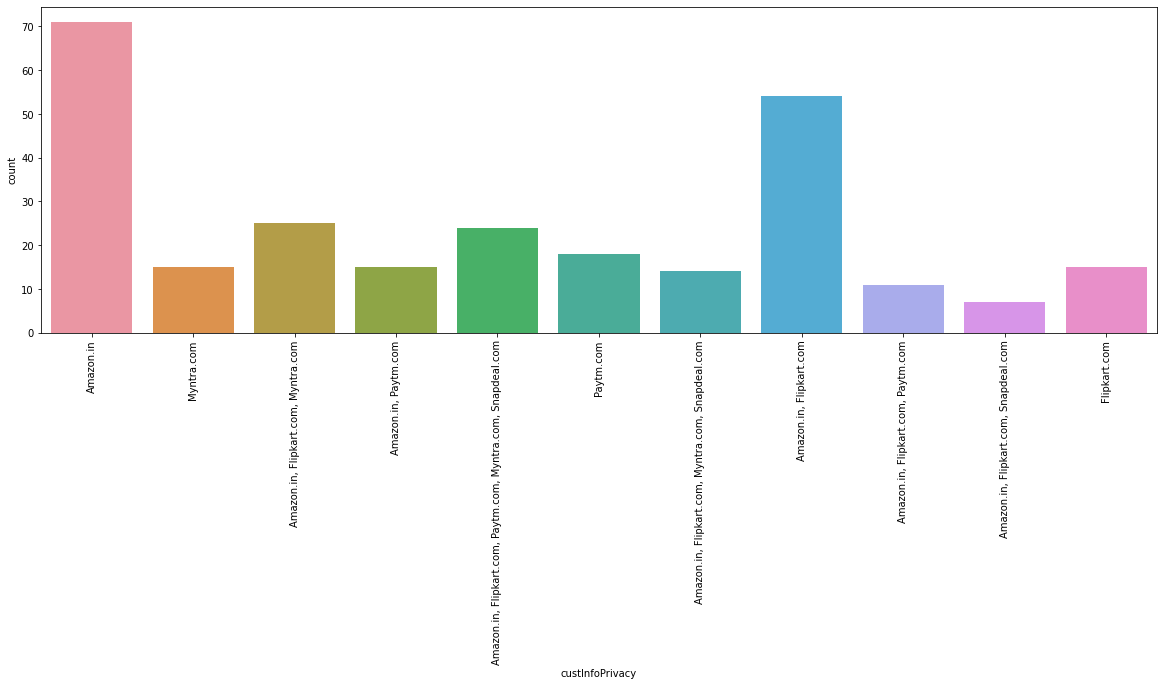

Observation: 

- Privacy of customers’ information: Amazon has a good reputation for maintaining privacy, followed by Flipkart
----------------------------------------------------------------------------------------------------


							 * financial_InfoSecurity * 

Amazon.in                                                       51
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    42
Flipkart.com                                                    33
Amazon.in, Flipkart.com, Snapdeal.com                           25
Amazon.in, Flipkart.com                                         24
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in, Snapdeal.com                                         19
Paytm.com                                                       15
Myntra.com                                                      15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Amazon.in, Flipkart.com, Paytm.com                             

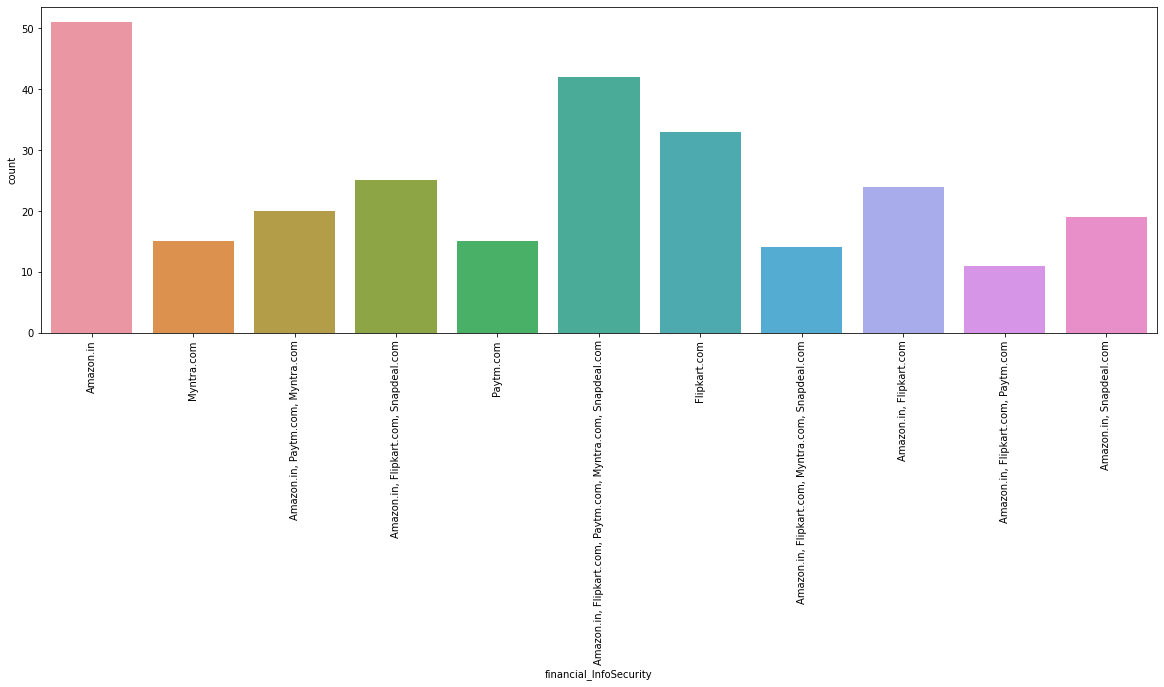

Observation: 

- Security of customer financial information:  Not only Amazon but also Flipkart, Paytm.com, Myntra.com, Snapdeal.com are also trusted by a lot of people. This shows that all companies pay special attention to security.
----------------------------------------------------------------------------------------------------


							 * perceivedTrustworthiness * 

Amazon.in                                                       76
Amazon.in, Flipkart.com, Snapdeal.com                           36
Amazon.in, Myntra.com                                           35
Amazon.in, Flipkart.com                                         31
Flipkart.com                                                    27
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               25
Myntra.com                                                      15
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    13
Amazon.in, Flipkart.com, Paytm.com                              11
Name: perceivedTrust

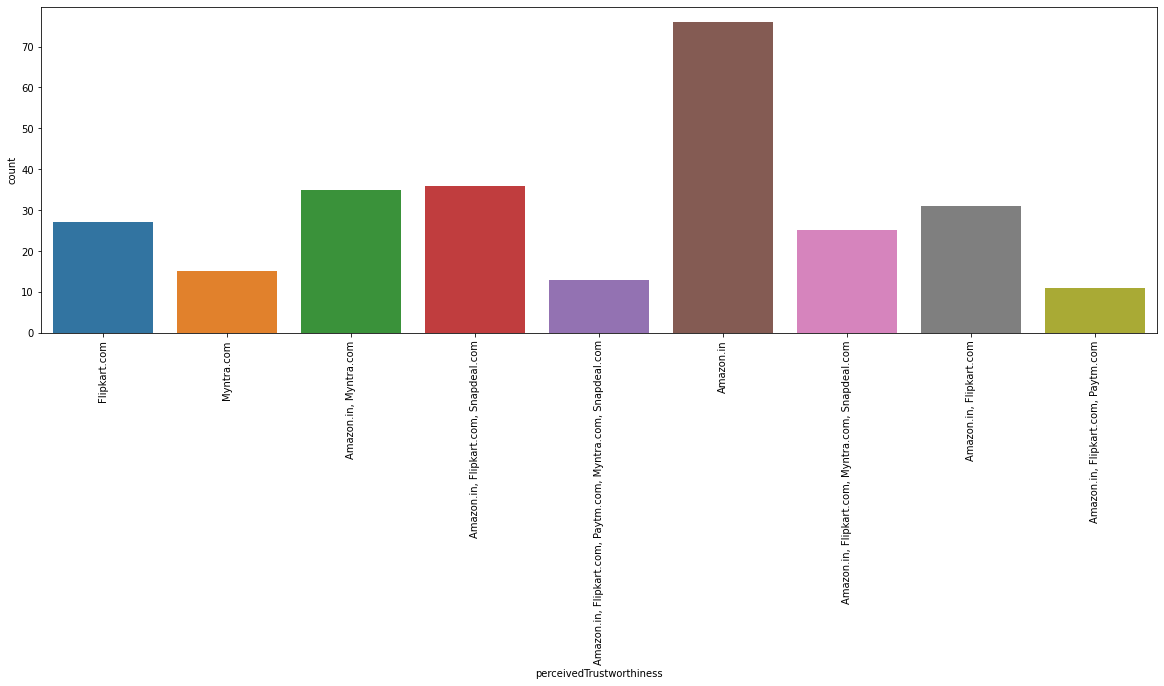

Observation: 

- Perceived Trustworthiness: Amazon has gained the most trust worthy company by the participants and the next votes goes to "Flipkart.com, Snapdeal.com and Myntra.com"
----------------------------------------------------------------------------------------------------


							 * multiChannelAssistance * 

Amazon.in, Flipkart.com, Myntra.com, Snapdeal    61
Amazon.in                                        60
Amazon.in, Flipkart.com                          39
Amazon.in, Snapdeal                              26
Myntra.com                                       20
Amazon.in, Myntra.com                            15
Amazon.in, Flipkart.com, Myntra.com              15
Amazon.in, Flipkart.com, Paytm.com               13
Paytm.com                                        12
Flipkart.com                                      8
Name: multiChannelAssistance, dtype: int64


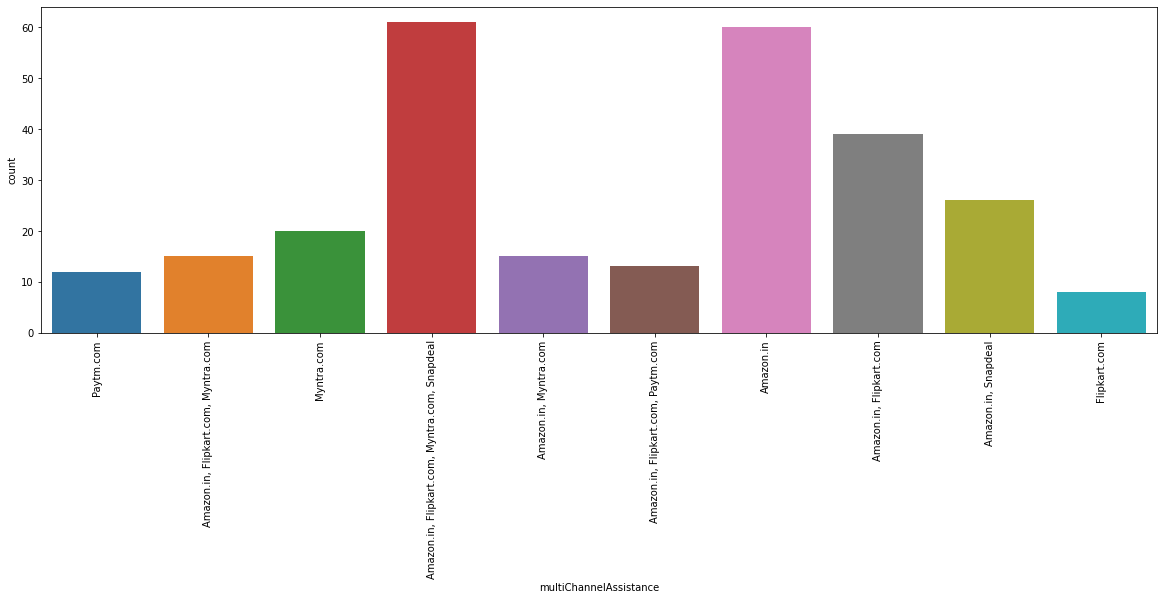

Observation: 

- multiChannelAssistance: Amazon.in, Flipkart.com, Myntra.com, Snapdeal
----------------------------------------------------------------------------------------------------


							 * longLoginTime * 

Amazon.in                                57
Paytm.com                                38
Amazon.in, Flipkart.com                  38
Myntra.com                               35
Amazon.in, Flipkart.com, Snapdeal.com    29
Snapdeal.com                             25
Flipkart.com, Paytm.com                  15
Flipkart.com, Paytm.com, Snapdeal.com    13
Amazon.in, Paytm.com                     11
Flipkart.com                              8
Name: longLoginTime, dtype: int64


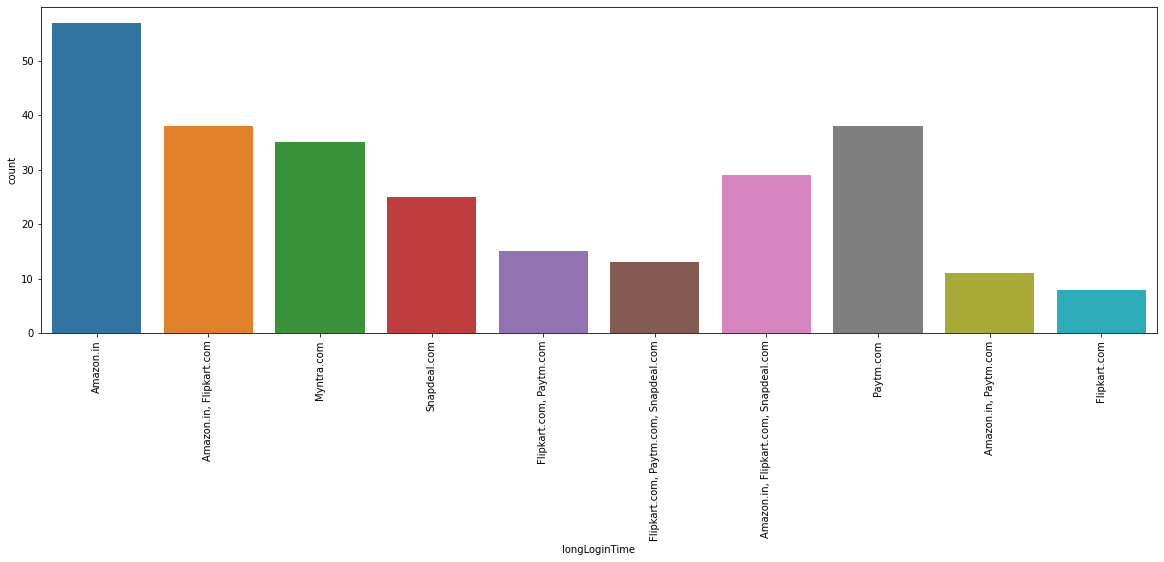

Observation: 

- Longer time to get logged in (promotion, sales period): "Amazon.in" and next "Paytm.com"
----------------------------------------------------------------------------------------------------


							 * longDisplayTime * 

Amazon.in, Flipkart.com                60
Amazon.in                              39
Myntra.com                             35
Snapdeal.com                           34
Myntra.com, Snapdeal.com               25
Flipkart.com, Snapdeal.com             19
Paytm.com                              15
Flipkart.com                           15
Amazon.in, Myntra.com, Snapdeal.com    14
Amazon.in, Paytm.com                   13
Name: longDisplayTime, dtype: int64


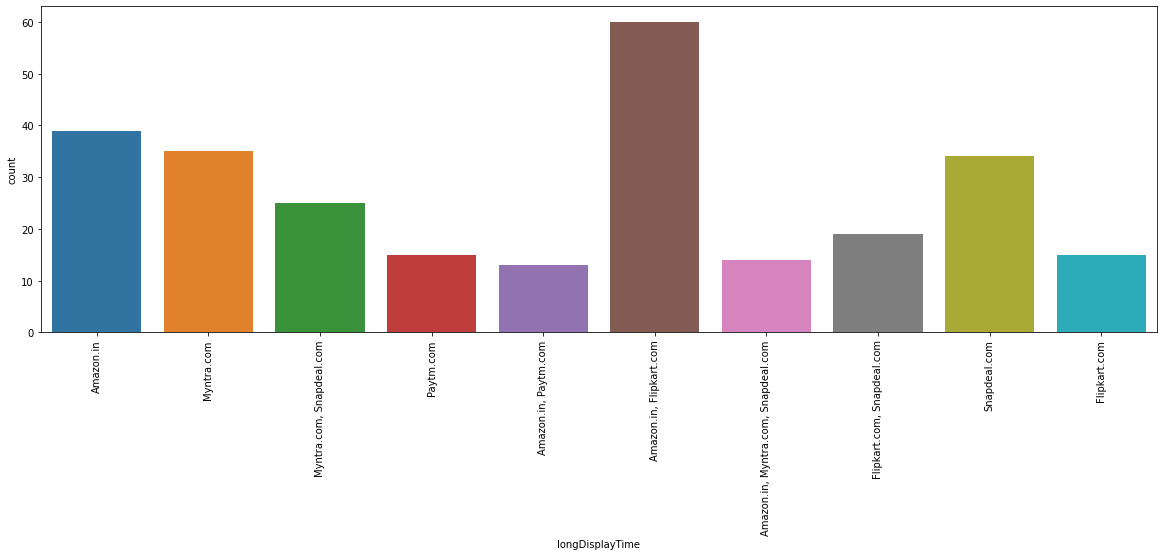

Observation: 

- Longer time in displaying graphics and photos (promotion, sales period): "Amazon.in", "Flipkart.com"
----------------------------------------------------------------------------------------------------


							 * latePriceDeclare * 

Myntra.com                 75
Paytm.com                  52
snapdeal.com               41
Amazon.in                  38
Flipkart.com               38
Amazon.in, Paytm.com       13
Paytm.com, snapdeal.com     7
Amazon.in, Flipkart.com     5
Name: latePriceDeclare, dtype: int64


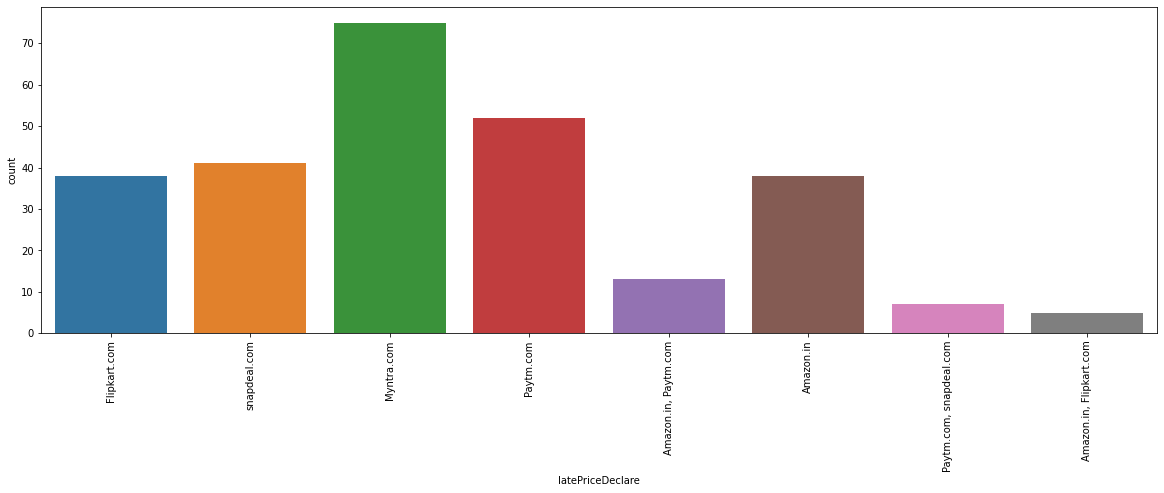

Observation: 

- Late declaration of price: Myntra, Paytm, Snapdeal. These companies should work on this area to improve.
----------------------------------------------------------------------------------------------------


							 * longLoadingTime * 

Myntra.com                          61
Paytm.com                           59
Flipkart.com                        32
Snapdeal.com                        23
Amazon.in, Flipkart.com             18
Amazon.in                           16
Paytm.com, Snapdeal.com             15
Amazon.in, Snapdeal.com             14
Amazon.in, Paytm.com                13
Flipkart.com, Snapdeal.com          11
Amazon.in, Paytm.com, Myntra.com     7
Name: longLoadingTime, dtype: int64


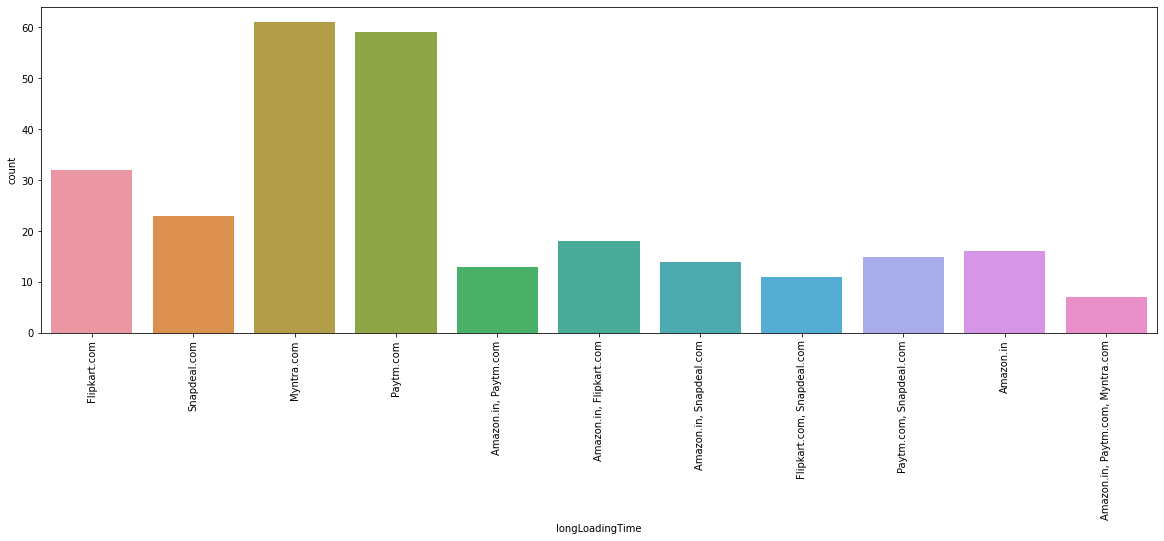

Observation: 

- Longer page loading time (promotion, sales period): Myntra and Paytm have bad feedback in this. Flipkart should also have a look into it, as it is at the 3rd place
----------------------------------------------------------------------------------------------------


							 * limitedPaymentMode * 

Snapdeal.com                87
Amazon.in                   62
Flipkart.com                31
Amazon.in, Flipkart.com     29
Paytm.com                   25
Paytm.com, Snapdeal.com     15
Amazon.in, Paytm.com        13
Myntra.com, Snapdeal.com     7
Name: limitedPaymentMode, dtype: int64


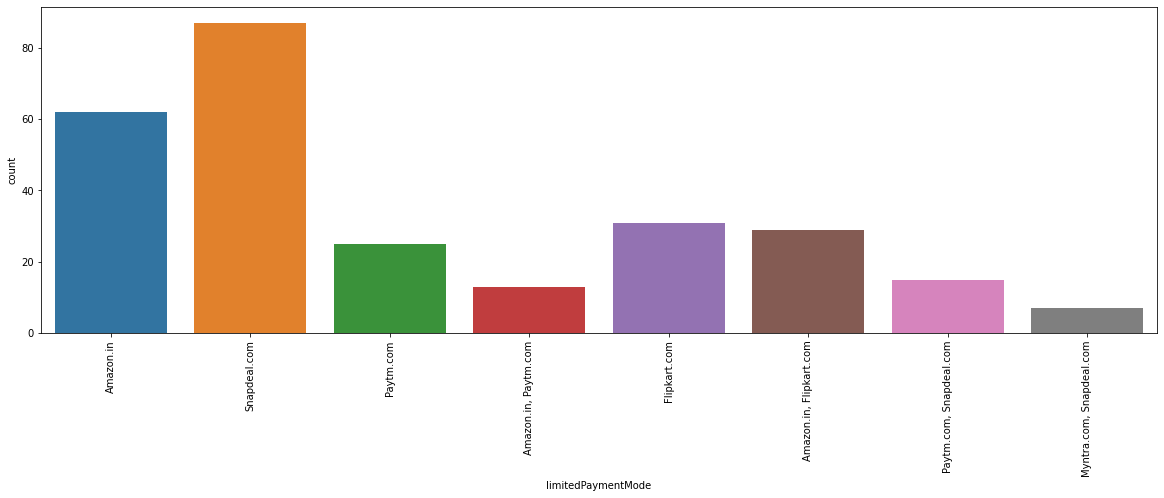

Observation: 

- Limited mode of payment on most products (promotion, sales period): Snapdeal is the most voted answer for this.
----------------------------------------------------------------------------------------------------


							 * LongerDeliveryPeriod * 

Paytm.com                  72
Snapdeal.com               64
Flipkart.com               44
Amazon.in                  37
Paytm.com, Snapdeal.com    26
Myntra.com                 26
Name: LongerDeliveryPeriod, dtype: int64


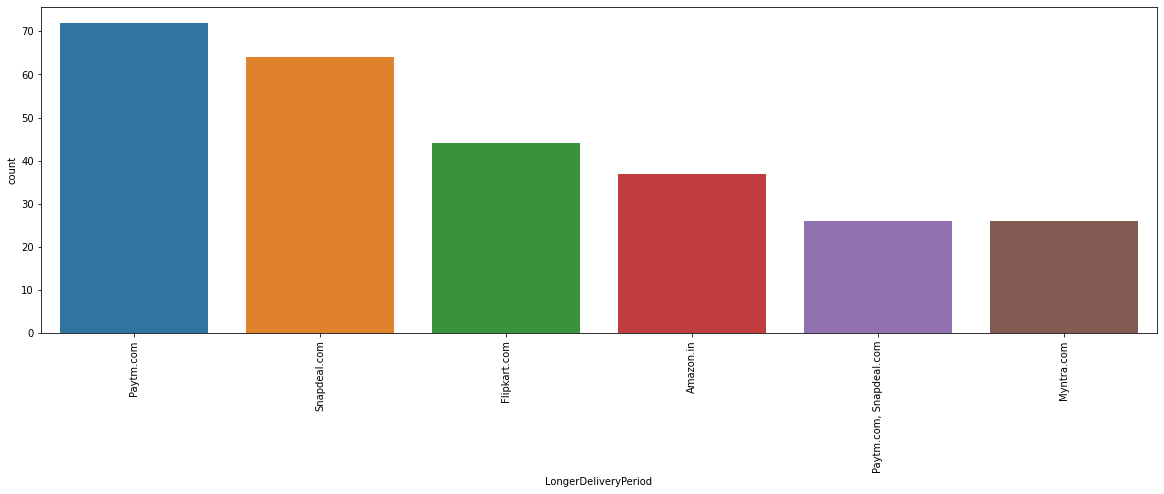

Observation: 

- Longer delivery period: "Paytm" and "Snapdeal" need to reduce their delivery time.
----------------------------------------------------------------------------------------------------


							 * webAppDesignChange * 

Amazon.in                   96
Paytm.com                   63
Amazon.in, Flipkart.com     45
Myntra.com                  30
Flipkart.com                20
Snapdeal.com                 8
Flipkart.com, Myntra.com     7
Name: webAppDesignChange, dtype: int64


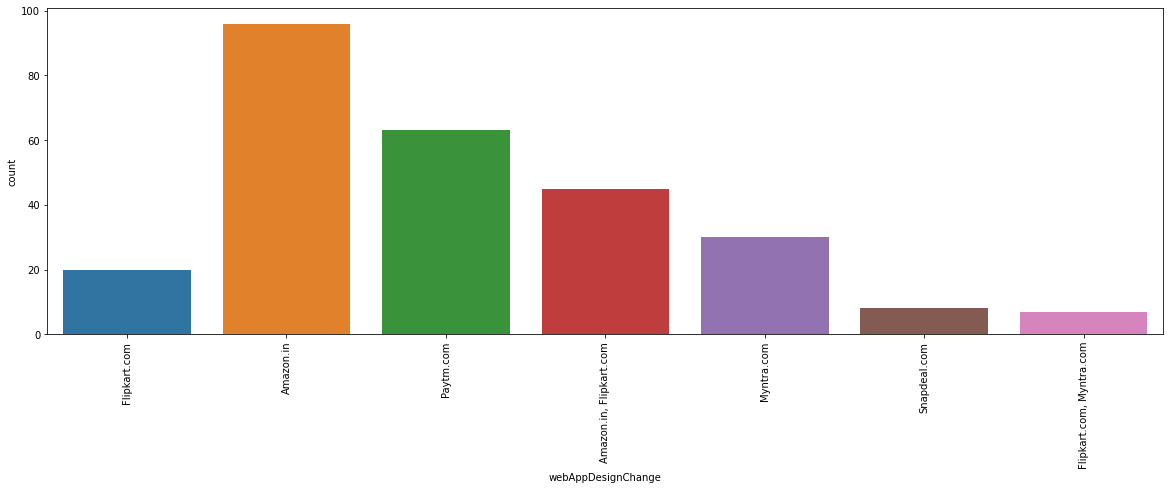

Observation: 

- Change in website/Application design: "Amazon.in"
----------------------------------------------------------------------------------------------------


							 * frequentPageDisruption * 

Amazon.in                     53
Myntra.com                    52
Snapdeal.com                  49
Paytm.com                     39
Flipkart.com                  26
Amazon.in, Flipkart.com       25
Myntra.com, Snapdeal.com      14
Flipkart.com, Snapdeal.com    11
Name: frequentPageDisruption, dtype: int64


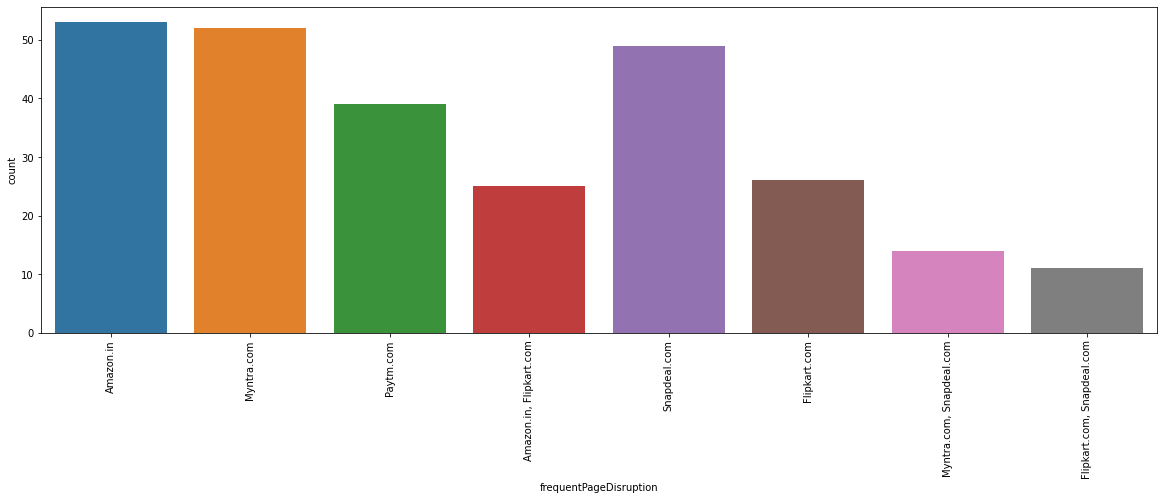

Observation: 

- Frequent disruption when moving from one page to another: Amazon.in
----------------------------------------------------------------------------------------------------


							 * webAppEfficiency * 

Amazon.in                             94
Flipkart.com                          47
Amazon.in, Flipkart.com               45
Amazon.in, Flipkart.com, Paytm.com    25
Amazon.in, Paytm.com                  18
Paytm.com                             15
Myntra.com, Snapdeal.com              14
Snapdeal.com                          11
Name: webAppEfficiency, dtype: int64


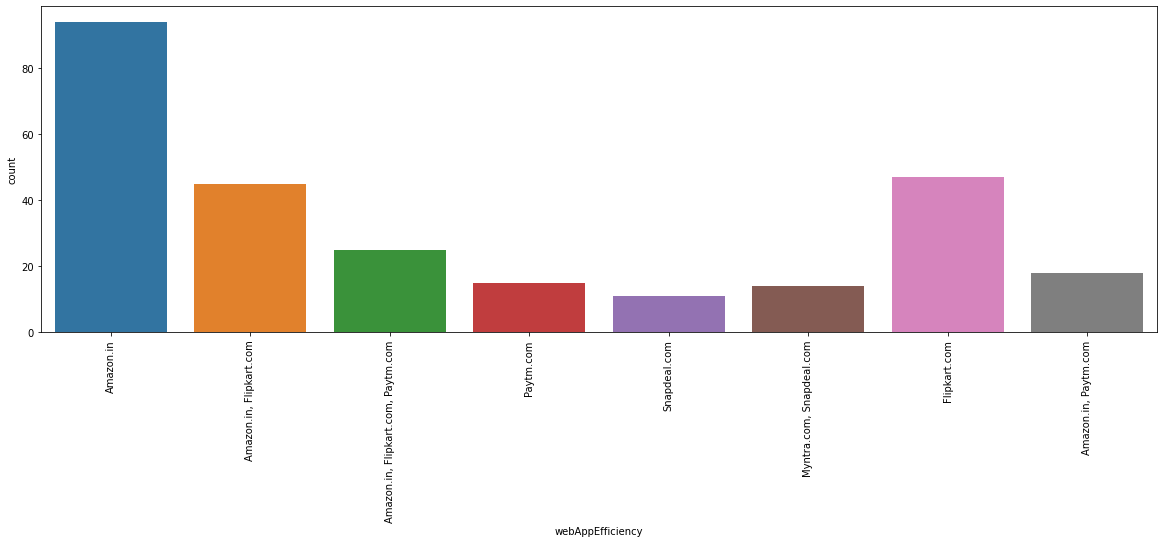

Observation: 

- Website is as efficient as before: Amazon.in
----------------------------------------------------------------------------------------------------


							 * recommendation * 

Amazon.in                                            79
Amazon.in, Flipkart.com                              62
Flipkart.com                                         39
Amazon.in, Myntra.com                                30
Amazon.in, Paytm.com, Myntra.com                     20
Amazon.in, Flipkart.com, Myntra.com                  15
Amazon.in, Paytm.com                                 13
Flipkart.com, Paytm.com, Myntra.com, snapdeal.com    11
Name: recommendation, dtype: int64


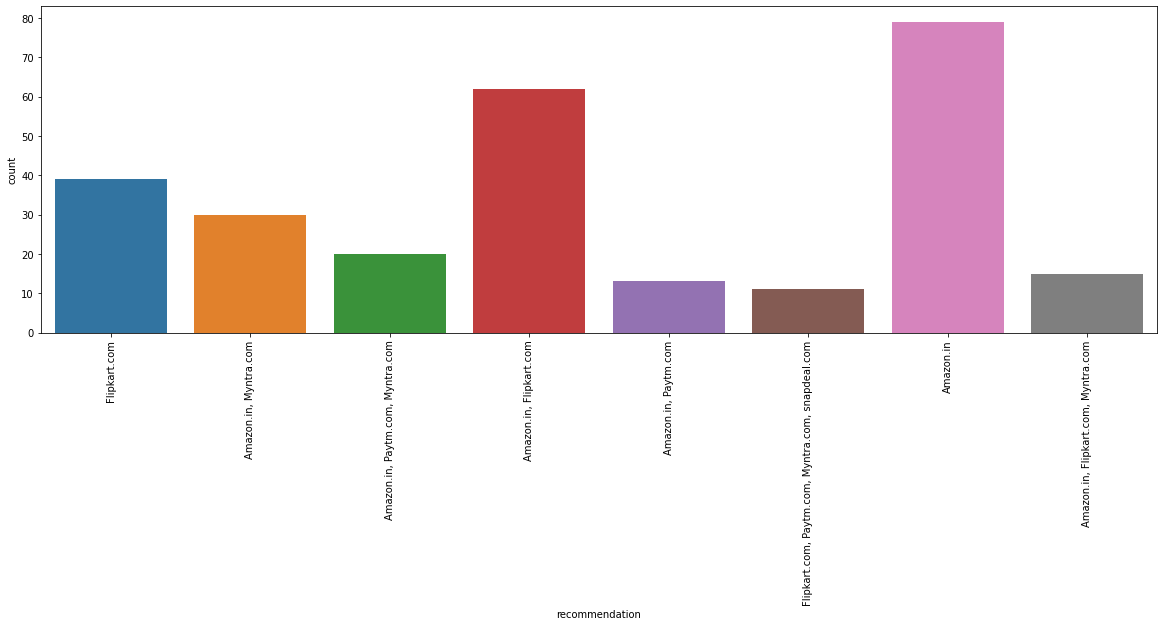

Observation: 

- Which of the Indian online retailer would you recommend to a friend?: "Amazon/Flipkart"
----------------------------------------------------------------------------------------------------




In [34]:
for col in ecommerce_columns:
    print('\t'*7,'*',col,'*','\n')
    print(data[col].value_counts())
    plt.figure(figsize=(20,6))
    sns.countplot(x=data[col])
    plt.xticks(rotation=90)
    plt.show()
    print('Observation: \n')
    input('- ')
    print('-----'*20)
    print('\n')  


_____________________________________________

## Summary
Comparing the Customer's Perceptions and the Company's performance we can conclude that the Companies likely to have

##### High Customer Satisfaction and Retenton:

    Amazon.com
    Flipkart.com


##### High Risk of Customer Churn:

    Myntra.com
    Snapdeal.com

# Conclusion
`AMAZON:` The most recommended websites with attractive web-page layout, easy to use, relevant descriptive information, product offers, reliability of website, quickness to complete purchase, trust worthiness.
What can be improved: Takes longer time to login, Late declaration or price during sales and promotion, frequent disruption when moving from one page to another, Limited mode of payment on most of products.


`FLIPKART:` This is the 2nd most recommended website with fast loading page, security of financial information, trust worthiness, several payments modes, website is as efficient as before.
What can be improved: Takes longer time in displaying graphics, late declaration of price during sales and promotion.


`PAYTM:` Reliability of website, speedy delivery of products, quickness in purchase.
What can be improved: Longer page loading time, Longer delivery period , late declaration of price during sales and promotion.


`MYNTRA:` Myntra stands on 3rd most recommended websites with easy to use, wild variety of product offers, several payment methods, attractive visual appealing web-page layout.
What can be improved: Relevant information about product, website loading speed, speedy delivery of products, websites is not much efficient as before.


`SNAPDEAL:` Least recommended website having less page loading time.
What can be improved: Limited mode of payments, frequent disruption while moving from one page to another, Longer delivery period, customer’s privacy information, reliability of website, offers on product, and must be an attractive web-page layout.

_____________________________________